In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, MFDataset
import xarray as xr
import pandas as pd
from scipy import spatial
from datetime import datetime
from datetime import timedelta

In [2]:
### MOSAiC Summer School
# Code by Thomas Rackow (AWI, YOPP) for 'climatological' sea ice buoy forecasts.
# Extend to a real forecast by using whatever U,V forecasts will be available on the ship.
# (c) 2019

In [3]:
# based on Thomas K. favourites; 1) Low Resolution Sea Ice Drift
# ftp://osisaf.met.no/archive/ice/drift_lr/

In [4]:
# and 2) AMSR-2 Global Sea Ice Concentration
# ftp://osisaf.met.no/prod/ice/conc_amsr/

### download data: sea ice drift velocities and concentration

In [5]:
# download latest drift velocities into folder 'drift-velocities'
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P drift-velocities ftp://osisaf.met.no/archive/ice/drift_lr/merged/

2019-09-11 21:46:11 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/ [801] -> "drift-velocities/archive/ice/drift_lr/merged/.listing" [1]
2019-09-11 21:46:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/ [179] -> "drift-velocities/archive/ice/drift_lr/merged/2009/.listing" [1]
2019-09-11 21:46:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/12/ [3023] -> "drift-velocities/archive/ice/drift_lr/merged/2009/12/.listing" [1]
2019-09-11 21:46:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/12/ice_drift_nh_polstere-625_multi-oi_200912061200-200912081200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2009/12/ice_drift_nh_polstere-625_multi-oi_200912061200-200912081200.nc" [1]
2019-09-11 21:46:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/12/ice_drift_nh_polstere-625_multi-oi_200912071200-200912091200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2009/12/ice_drift_nh_polstere-625_multi-oi_200912071200-20091

2019-09-11 21:46:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001021200-201001041200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001021200-201001041200.nc" [1]
2019-09-11 21:46:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001031200-201001051200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001031200-201001051200.nc" [1]
2019-09-11 21:46:39 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001041200-201001061200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001041200-201001061200.nc" [1]
2019-09-11 21:46:40 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ice_drift_nh_polstere-625_multi-oi_201001051200-201001071200.nc [724888] -> "dr

2019-09-11 21:47:05 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201001311200-201002021200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201001311200-201002021200.nc" [1]
2019-09-11 21:47:06 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002011200-201002031200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002011200-201002031200.nc" [1]
2019-09-11 21:47:07 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002021200-201002041200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002021200-201002041200.nc" [1]
2019-09-11 21:47:08 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ice_drift_nh_polstere-625_multi-oi_201002031200-201002051200.nc [724888] -> "dr

2019-09-11 21:47:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003011200-201003031200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003011200-201003031200.nc" [1]
2019-09-11 21:47:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003021200-201003041200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003021200-201003041200.nc" [1]
2019-09-11 21:47:33 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003031200-201003051200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003031200-201003051200.nc" [1]
2019-09-11 21:47:34 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/03/ice_drift_nh_polstere-625_multi-oi_201003041200-201003061200.nc [724888] -> "dr

2019-09-11 21:47:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201003301200-201004011200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201003301200-201004011200.nc" [1]
2019-09-11 21:47:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201003311200-201004021200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201003311200-201004021200.nc" [1]
2019-09-11 21:47:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201004011200-201004031200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201004011200-201004031200.nc" [1]
2019-09-11 21:47:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/04/ice_drift_nh_polstere-625_multi-oi_201004021200-201004041200.nc [724888] -> "dr

2019-09-11 21:48:33 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/05/ [3870] -> "drift-velocities/archive/ice/drift_lr/merged/2010/05/.listing" [1]
2019-09-11 21:48:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201004291200-201005011200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201004291200-201005011200.nc" [1]
2019-09-11 21:48:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201004301200-201005021200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201004301200-201005021200.nc" [1]
2019-09-11 21:48:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201005011200-201005031200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201005011200-201005031200.nc" [1]


2019-09-11 21:49:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201005281200-201005301200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201005281200-201005301200.nc" [1]
2019-09-11 21:49:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201005291200-201005311200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/05/ice_drift_nh_polstere-625_multi-oi_201005291200-201005311200.nc" [1]
2019-09-11 21:49:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/06/ [3749] -> "drift-velocities/archive/ice/drift_lr/merged/2010/06/.listing" [1]
2019-09-11 21:49:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/06/ice_drift_nh_polstere-625_multi-oi_201005301200-201006011200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/06/ice_drift_nh_polstere-625_multi-oi_201005301200-201006011200.nc" [1]


2019-09-11 21:50:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/06/ice_drift_nh_polstere-625_multi-oi_201006261200-201006281200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/06/ice_drift_nh_polstere-625_multi-oi_201006261200-201006281200.nc" [1]
2019-09-11 21:50:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/06/ice_drift_nh_polstere-625_multi-oi_201006271200-201006291200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/06/ice_drift_nh_polstere-625_multi-oi_201006271200-201006291200.nc" [1]
2019-09-11 21:51:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/06/ice_drift_nh_polstere-625_multi-oi_201006281200-201006301200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/06/ice_drift_nh_polstere-625_multi-oi_201006281200-201006301200.nc" [1]
2019-09-11 21:51:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/07/ [3870] -> "drift-velocities/archive/ice/drift_lr/merged/2010/07/.listing" [1]


2019-09-11 21:51:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/07/ice_drift_nh_polstere-625_multi-oi_201007251200-201007271200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/07/ice_drift_nh_polstere-625_multi-oi_201007251200-201007271200.nc" [1]
2019-09-11 21:51:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/07/ice_drift_nh_polstere-625_multi-oi_201007261200-201007281200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/07/ice_drift_nh_polstere-625_multi-oi_201007261200-201007281200.nc" [1]
2019-09-11 21:51:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/07/ice_drift_nh_polstere-625_multi-oi_201007271200-201007291200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/07/ice_drift_nh_polstere-625_multi-oi_201007271200-201007291200.nc" [1]
2019-09-11 21:52:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/07/ice_drift_nh_polstere-625_multi-oi_201007281200-201007301200.nc [725052] -> "dr

2019-09-11 21:52:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/08/ice_drift_nh_polstere-625_multi-oi_201008231200-201008251200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/08/ice_drift_nh_polstere-625_multi-oi_201008231200-201008251200.nc" [1]
2019-09-11 21:52:26 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/08/ice_drift_nh_polstere-625_multi-oi_201008241200-201008261200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/08/ice_drift_nh_polstere-625_multi-oi_201008241200-201008261200.nc" [1]
2019-09-11 21:52:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/08/ice_drift_nh_polstere-625_multi-oi_201008251200-201008271200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/08/ice_drift_nh_polstere-625_multi-oi_201008251200-201008271200.nc" [1]
2019-09-11 21:52:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/08/ice_drift_nh_polstere-625_multi-oi_201008261200-201008281200.nc [725052] -> "dr

2019-09-11 21:52:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/09/ice_drift_nh_polstere-625_multi-oi_201009211200-201009231200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/09/ice_drift_nh_polstere-625_multi-oi_201009211200-201009231200.nc" [1]
2019-09-11 21:52:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/09/ice_drift_nh_polstere-625_multi-oi_201009221200-201009241200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/09/ice_drift_nh_polstere-625_multi-oi_201009221200-201009241200.nc" [1]
2019-09-11 21:52:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/09/ice_drift_nh_polstere-625_multi-oi_201009231200-201009251200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2010/09/ice_drift_nh_polstere-625_multi-oi_201009231200-201009251200.nc" [1]
2019-09-11 21:52:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/09/ice_drift_nh_polstere-625_multi-oi_201009241200-201009261200.nc [725052] -> "dr

2019-09-11 21:53:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/10/ice_drift_nh_polstere-625_multi-oi_201010201200-201010221200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/10/ice_drift_nh_polstere-625_multi-oi_201010201200-201010221200.nc" [1]
2019-09-11 21:53:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/10/ice_drift_nh_polstere-625_multi-oi_201010211200-201010231200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/10/ice_drift_nh_polstere-625_multi-oi_201010211200-201010231200.nc" [1]
2019-09-11 21:53:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/10/ice_drift_nh_polstere-625_multi-oi_201010221200-201010241200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/10/ice_drift_nh_polstere-625_multi-oi_201010221200-201010241200.nc" [1]
2019-09-11 21:53:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/10/ice_drift_nh_polstere-625_multi-oi_201010231200-201010251200.nc [724888] -> "dr

2019-09-11 21:53:49 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/11/ice_drift_nh_polstere-625_multi-oi_201011181200-201011201200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/11/ice_drift_nh_polstere-625_multi-oi_201011181200-201011201200.nc" [1]
2019-09-11 21:53:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/11/ice_drift_nh_polstere-625_multi-oi_201011191200-201011211200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/11/ice_drift_nh_polstere-625_multi-oi_201011191200-201011211200.nc" [1]
2019-09-11 21:53:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/11/ice_drift_nh_polstere-625_multi-oi_201011201200-201011221200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/11/ice_drift_nh_polstere-625_multi-oi_201011201200-201011221200.nc" [1]
2019-09-11 21:53:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/11/ice_drift_nh_polstere-625_multi-oi_201011211200-201011231200.nc [724888] -> "dr

2019-09-11 21:54:17 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/12/ice_drift_nh_polstere-625_multi-oi_201012171200-201012191200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/12/ice_drift_nh_polstere-625_multi-oi_201012171200-201012191200.nc" [1]
2019-09-11 21:54:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/12/ice_drift_nh_polstere-625_multi-oi_201012181200-201012201200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/12/ice_drift_nh_polstere-625_multi-oi_201012181200-201012201200.nc" [1]
2019-09-11 21:54:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/12/ice_drift_nh_polstere-625_multi-oi_201012191200-201012211200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2010/12/ice_drift_nh_polstere-625_multi-oi_201012191200-201012211200.nc" [1]
2019-09-11 21:54:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/12/ice_drift_nh_polstere-625_multi-oi_201012201200-201012221200.nc [724888] -> "dr

2019-09-11 21:54:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/01/ice_drift_nh_polstere-625_multi-oi_201101151200-201101171200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2011/01/ice_drift_nh_polstere-625_multi-oi_201101151200-201101171200.nc" [1]
2019-09-11 21:54:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/01/ice_drift_nh_polstere-625_multi-oi_201101161200-201101181200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2011/01/ice_drift_nh_polstere-625_multi-oi_201101161200-201101181200.nc" [1]
2019-09-11 21:54:48 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/01/ice_drift_nh_polstere-625_multi-oi_201101171200-201101191200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2011/01/ice_drift_nh_polstere-625_multi-oi_201101171200-201101191200.nc" [1]
2019-09-11 21:54:48 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/01/ice_drift_nh_polstere-625_multi-oi_201101181200-201101201200.nc [724888] -> "dr

2019-09-11 21:55:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/02/ice_drift_nh_polstere-625_multi-oi_201102131200-201102151200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2011/02/ice_drift_nh_polstere-625_multi-oi_201102131200-201102151200.nc" [1]
2019-09-11 21:55:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/02/ice_drift_nh_polstere-625_multi-oi_201102141200-201102161200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2011/02/ice_drift_nh_polstere-625_multi-oi_201102141200-201102161200.nc" [1]
2019-09-11 21:55:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/02/ice_drift_nh_polstere-625_multi-oi_201102151200-201102171200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2011/02/ice_drift_nh_polstere-625_multi-oi_201102151200-201102171200.nc" [1]
2019-09-11 21:55:14 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/02/ice_drift_nh_polstere-625_multi-oi_201102161200-201102181200.nc [724888] -> "dr

2019-09-11 21:55:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/03/ice_drift_nh_polstere-625_multi-oi_201103151200-201103171200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2011/03/ice_drift_nh_polstere-625_multi-oi_201103151200-201103171200.nc" [1]
2019-09-11 21:55:38 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/03/ice_drift_nh_polstere-625_multi-oi_201103161200-201103181200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2011/03/ice_drift_nh_polstere-625_multi-oi_201103161200-201103181200.nc" [1]
2019-09-11 21:55:39 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/03/ice_drift_nh_polstere-625_multi-oi_201103171200-201103191200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2011/03/ice_drift_nh_polstere-625_multi-oi_201103171200-201103191200.nc" [1]
2019-09-11 21:55:40 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/03/ice_drift_nh_polstere-625_multi-oi_201103181200-201103201200.nc [724888] -> "dr

2019-09-11 21:56:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/04/ice_drift_nh_polstere-625_multi-oi_201104131200-201104151200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2011/04/ice_drift_nh_polstere-625_multi-oi_201104131200-201104151200.nc" [1]
2019-09-11 21:56:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/04/ice_drift_nh_polstere-625_multi-oi_201104141200-201104161200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2011/04/ice_drift_nh_polstere-625_multi-oi_201104141200-201104161200.nc" [1]
2019-09-11 21:56:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/04/ice_drift_nh_polstere-625_multi-oi_201104151200-201104171200.nc [724888] -> "drift-velocities/archive/ice/drift_lr/merged/2011/04/ice_drift_nh_polstere-625_multi-oi_201104151200-201104171200.nc" [1]
2019-09-11 21:56:04 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/04/ice_drift_nh_polstere-625_multi-oi_201104161200-201104181200.nc [724888] -> "dr

2019-09-11 21:56:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/05/ice_drift_nh_polstere-625_multi-oi_201105121200-201105141200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/05/ice_drift_nh_polstere-625_multi-oi_201105121200-201105141200.nc" [1]
2019-09-11 21:56:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/05/ice_drift_nh_polstere-625_multi-oi_201105131200-201105151200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/05/ice_drift_nh_polstere-625_multi-oi_201105131200-201105151200.nc" [1]
2019-09-11 21:56:33 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/05/ice_drift_nh_polstere-625_multi-oi_201105141200-201105161200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/05/ice_drift_nh_polstere-625_multi-oi_201105141200-201105161200.nc" [1]
2019-09-11 21:56:34 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/05/ice_drift_nh_polstere-625_multi-oi_201105151200-201105171200.nc [725052] -> "dr

2019-09-11 21:57:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/06/ice_drift_nh_polstere-625_multi-oi_201106101200-201106121200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/06/ice_drift_nh_polstere-625_multi-oi_201106101200-201106121200.nc" [1]
2019-09-11 21:57:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/06/ice_drift_nh_polstere-625_multi-oi_201106111200-201106131200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/06/ice_drift_nh_polstere-625_multi-oi_201106111200-201106131200.nc" [1]
2019-09-11 21:57:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/06/ice_drift_nh_polstere-625_multi-oi_201106121200-201106141200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/06/ice_drift_nh_polstere-625_multi-oi_201106121200-201106141200.nc" [1]
2019-09-11 21:57:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/06/ice_drift_nh_polstere-625_multi-oi_201106131200-201106151200.nc [725052] -> "dr

2019-09-11 21:57:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/07/ice_drift_nh_polstere-625_multi-oi_201107091200-201107111200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/07/ice_drift_nh_polstere-625_multi-oi_201107091200-201107111200.nc" [1]
2019-09-11 21:57:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/07/ice_drift_nh_polstere-625_multi-oi_201107101200-201107121200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/07/ice_drift_nh_polstere-625_multi-oi_201107101200-201107121200.nc" [1]
2019-09-11 21:57:29 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/07/ice_drift_nh_polstere-625_multi-oi_201107111200-201107131200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/07/ice_drift_nh_polstere-625_multi-oi_201107111200-201107131200.nc" [1]
2019-09-11 21:57:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/07/ice_drift_nh_polstere-625_multi-oi_201107121200-201107141200.nc [725052] -> "dr

2019-09-11 21:57:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/08/ice_drift_nh_polstere-625_multi-oi_201108071200-201108091200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/08/ice_drift_nh_polstere-625_multi-oi_201108071200-201108091200.nc" [1]
2019-09-11 21:57:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/08/ice_drift_nh_polstere-625_multi-oi_201108081200-201108101200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/08/ice_drift_nh_polstere-625_multi-oi_201108081200-201108101200.nc" [1]
2019-09-11 21:57:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/08/ice_drift_nh_polstere-625_multi-oi_201108091200-201108111200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/08/ice_drift_nh_polstere-625_multi-oi_201108091200-201108111200.nc" [1]
2019-09-11 21:57:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/08/ice_drift_nh_polstere-625_multi-oi_201108101200-201108121200.nc [725052] -> "dr

2019-09-11 21:59:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/09/ice_drift_nh_polstere-625_multi-oi_201109051200-201109071200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/09/ice_drift_nh_polstere-625_multi-oi_201109051200-201109071200.nc" [1]
2019-09-11 21:59:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/09/ice_drift_nh_polstere-625_multi-oi_201109061200-201109081200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/09/ice_drift_nh_polstere-625_multi-oi_201109061200-201109081200.nc" [1]
2019-09-11 21:59:24 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/09/ice_drift_nh_polstere-625_multi-oi_201109071200-201109091200.nc [725052] -> "drift-velocities/archive/ice/drift_lr/merged/2011/09/ice_drift_nh_polstere-625_multi-oi_201109071200-201109091200.nc" [1]
2019-09-11 21:59:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/09/ice_drift_nh_polstere-625_multi-oi_201109081200-201109101200.nc [725052] -> "dr

2019-09-11 21:59:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/10/ice_drift_nh_polstere-625_multi-oi_201110041200-201110061200.nc [704744] -> "drift-velocities/archive/ice/drift_lr/merged/2011/10/ice_drift_nh_polstere-625_multi-oi_201110041200-201110061200.nc" [1]
2019-09-11 21:59:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/10/ice_drift_nh_polstere-625_multi-oi_201110051200-201110071200.nc [704744] -> "drift-velocities/archive/ice/drift_lr/merged/2011/10/ice_drift_nh_polstere-625_multi-oi_201110051200-201110071200.nc" [1]
2019-09-11 21:59:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/10/ice_drift_nh_polstere-625_multi-oi_201110061200-201110081200.nc [704744] -> "drift-velocities/archive/ice/drift_lr/merged/2011/10/ice_drift_nh_polstere-625_multi-oi_201110061200-201110081200.nc" [1]
2019-09-11 22:00:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/10/ice_drift_nh_polstere-625_multi-oi_201110071200-201110091200.nc [704744] -> "dr

2019-09-11 22:01:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/11/ice_drift_nh_polstere-625_multi-oi_201111021200-201111041200.nc [704744] -> "drift-velocities/archive/ice/drift_lr/merged/2011/11/ice_drift_nh_polstere-625_multi-oi_201111021200-201111041200.nc" [1]
2019-09-11 22:01:16 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/11/ice_drift_nh_polstere-625_multi-oi_201111031200-201111051200.nc [704744] -> "drift-velocities/archive/ice/drift_lr/merged/2011/11/ice_drift_nh_polstere-625_multi-oi_201111031200-201111051200.nc" [1]
2019-09-11 22:01:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/11/ice_drift_nh_polstere-625_multi-oi_201111041200-201111061200.nc [704744] -> "drift-velocities/archive/ice/drift_lr/merged/2011/11/ice_drift_nh_polstere-625_multi-oi_201111041200-201111061200.nc" [1]
2019-09-11 22:01:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/11/ice_drift_nh_polstere-625_multi-oi_201111051200-201111071200.nc [704744] -> "dr

2019-09-11 22:01:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/12/ice_drift_nh_polstere-625_multi-oi_201112011200-201112031200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2011/12/ice_drift_nh_polstere-625_multi-oi_201112011200-201112031200.nc" [1]
2019-09-11 22:02:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/12/ice_drift_nh_polstere-625_multi-oi_201112021200-201112041200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2011/12/ice_drift_nh_polstere-625_multi-oi_201112021200-201112041200.nc" [1]
2019-09-11 22:02:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/12/ice_drift_nh_polstere-625_multi-oi_201112031200-201112051200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2011/12/ice_drift_nh_polstere-625_multi-oi_201112031200-201112051200.nc" [1]
2019-09-11 22:02:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2011/12/ice_drift_nh_polstere-625_multi-oi_201112041200-201112061200.nc [833776] -> "dr

2019-09-11 22:02:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/01/ [3870] -> "drift-velocities/archive/ice/drift_lr/merged/2012/01/.listing" [1]
2019-09-11 22:02:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/01/ice_drift_nh_polstere-625_multi-oi_201112301200-201201011200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/01/ice_drift_nh_polstere-625_multi-oi_201112301200-201201011200.nc" [1]
2019-09-11 22:02:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/01/ice_drift_nh_polstere-625_multi-oi_201112311200-201201021200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/01/ice_drift_nh_polstere-625_multi-oi_201112311200-201201021200.nc" [1]
2019-09-11 22:02:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/01/ice_drift_nh_polstere-625_multi-oi_201201011200-201201031200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/01/ice_drift_nh_polstere-625_multi-oi_201201011200-201201031200.nc" [1]


2019-09-11 22:03:11 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/01/ice_drift_nh_polstere-625_multi-oi_201201281200-201201301200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/01/ice_drift_nh_polstere-625_multi-oi_201201281200-201201301200.nc" [1]
2019-09-11 22:03:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/01/ice_drift_nh_polstere-625_multi-oi_201201291200-201201311200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/01/ice_drift_nh_polstere-625_multi-oi_201201291200-201201311200.nc" [1]
2019-09-11 22:03:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/02/ [3628] -> "drift-velocities/archive/ice/drift_lr/merged/2012/02/.listing" [1]
2019-09-11 22:03:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/02/ice_drift_nh_polstere-625_multi-oi_201201301200-201202011200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/02/ice_drift_nh_polstere-625_multi-oi_201201301200-201202011200.nc" [1]


2019-09-11 22:03:33 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/02/ice_drift_nh_polstere-625_multi-oi_201202261200-201202281200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/02/ice_drift_nh_polstere-625_multi-oi_201202261200-201202281200.nc" [1]
2019-09-11 22:03:34 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/02/ice_drift_nh_polstere-625_multi-oi_201202271200-201202291200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/02/ice_drift_nh_polstere-625_multi-oi_201202271200-201202291200.nc" [1]
2019-09-11 22:03:34 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/03/ [3870] -> "drift-velocities/archive/ice/drift_lr/merged/2012/03/.listing" [1]
2019-09-11 22:03:35 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/03/ice_drift_nh_polstere-625_multi-oi_201202281200-201203011200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/03/ice_drift_nh_polstere-625_multi-oi_201202281200-201203011200.nc" [1]


2019-09-11 22:03:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/03/ice_drift_nh_polstere-625_multi-oi_201203261200-201203281200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/03/ice_drift_nh_polstere-625_multi-oi_201203261200-201203281200.nc" [1]
2019-09-11 22:03:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/03/ice_drift_nh_polstere-625_multi-oi_201203271200-201203291200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/03/ice_drift_nh_polstere-625_multi-oi_201203271200-201203291200.nc" [1]
2019-09-11 22:03:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/03/ice_drift_nh_polstere-625_multi-oi_201203281200-201203301200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/03/ice_drift_nh_polstere-625_multi-oi_201203281200-201203301200.nc" [1]
2019-09-11 22:03:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/03/ice_drift_nh_polstere-625_multi-oi_201203291200-201203311200.nc [833776] -> "dr

2019-09-11 22:04:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/04/ice_drift_nh_polstere-625_multi-oi_201204241200-201204261200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/04/ice_drift_nh_polstere-625_multi-oi_201204241200-201204261200.nc" [1]
2019-09-11 22:04:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/04/ice_drift_nh_polstere-625_multi-oi_201204251200-201204271200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/04/ice_drift_nh_polstere-625_multi-oi_201204251200-201204271200.nc" [1]
2019-09-11 22:04:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/04/ice_drift_nh_polstere-625_multi-oi_201204261200-201204281200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/04/ice_drift_nh_polstere-625_multi-oi_201204261200-201204281200.nc" [1]
2019-09-11 22:04:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/04/ice_drift_nh_polstere-625_multi-oi_201204271200-201204291200.nc [833776] -> "dr

2019-09-11 22:04:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/05/ice_drift_nh_polstere-625_multi-oi_201205231200-201205251200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/05/ice_drift_nh_polstere-625_multi-oi_201205231200-201205251200.nc" [1]
2019-09-11 22:04:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/05/ice_drift_nh_polstere-625_multi-oi_201205241200-201205261200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/05/ice_drift_nh_polstere-625_multi-oi_201205241200-201205261200.nc" [1]
2019-09-11 22:04:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/05/ice_drift_nh_polstere-625_multi-oi_201205251200-201205271200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/05/ice_drift_nh_polstere-625_multi-oi_201205251200-201205271200.nc" [1]
2019-09-11 22:04:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/05/ice_drift_nh_polstere-625_multi-oi_201205261200-201205281200.nc [833940] -> "dr

2019-09-11 22:05:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/06/ice_drift_nh_polstere-625_multi-oi_201206211200-201206231200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/06/ice_drift_nh_polstere-625_multi-oi_201206211200-201206231200.nc" [1]
2019-09-11 22:05:34 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/06/ice_drift_nh_polstere-625_multi-oi_201206221200-201206241200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/06/ice_drift_nh_polstere-625_multi-oi_201206221200-201206241200.nc" [1]
2019-09-11 22:05:35 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/06/ice_drift_nh_polstere-625_multi-oi_201206231200-201206251200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/06/ice_drift_nh_polstere-625_multi-oi_201206231200-201206251200.nc" [1]
2019-09-11 22:05:38 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/06/ice_drift_nh_polstere-625_multi-oi_201206241200-201206261200.nc [833940] -> "dr

2019-09-11 22:06:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/07/ice_drift_nh_polstere-625_multi-oi_201207201200-201207221200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/07/ice_drift_nh_polstere-625_multi-oi_201207201200-201207221200.nc" [1]
2019-09-11 22:06:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/07/ice_drift_nh_polstere-625_multi-oi_201207211200-201207231200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/07/ice_drift_nh_polstere-625_multi-oi_201207211200-201207231200.nc" [1]
2019-09-11 22:06:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/07/ice_drift_nh_polstere-625_multi-oi_201207221200-201207241200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/07/ice_drift_nh_polstere-625_multi-oi_201207221200-201207241200.nc" [1]
2019-09-11 22:06:26 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/07/ice_drift_nh_polstere-625_multi-oi_201207231200-201207251200.nc [833940] -> "dr

2019-09-11 22:06:49 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/08/ice_drift_nh_polstere-625_multi-oi_201208181200-201208201200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/08/ice_drift_nh_polstere-625_multi-oi_201208181200-201208201200.nc" [1]
2019-09-11 22:06:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/08/ice_drift_nh_polstere-625_multi-oi_201208191200-201208211200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/08/ice_drift_nh_polstere-625_multi-oi_201208191200-201208211200.nc" [1]
2019-09-11 22:06:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/08/ice_drift_nh_polstere-625_multi-oi_201208201200-201208221200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/08/ice_drift_nh_polstere-625_multi-oi_201208201200-201208221200.nc" [1]
2019-09-11 22:06:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/08/ice_drift_nh_polstere-625_multi-oi_201208211200-201208231200.nc [833940] -> "dr

2019-09-11 22:07:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/09/ice_drift_nh_polstere-625_multi-oi_201209161200-201209181200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/09/ice_drift_nh_polstere-625_multi-oi_201209161200-201209181200.nc" [1]
2019-09-11 22:07:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/09/ice_drift_nh_polstere-625_multi-oi_201209171200-201209191200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/09/ice_drift_nh_polstere-625_multi-oi_201209171200-201209191200.nc" [1]
2019-09-11 22:07:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/09/ice_drift_nh_polstere-625_multi-oi_201209181200-201209201200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2012/09/ice_drift_nh_polstere-625_multi-oi_201209181200-201209201200.nc" [1]
2019-09-11 22:07:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/09/ice_drift_nh_polstere-625_multi-oi_201209191200-201209211200.nc [833940] -> "dr

2019-09-11 22:07:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/10/ice_drift_nh_polstere-625_multi-oi_201210151200-201210171200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/10/ice_drift_nh_polstere-625_multi-oi_201210151200-201210171200.nc" [1]
2019-09-11 22:07:48 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/10/ice_drift_nh_polstere-625_multi-oi_201210161200-201210181200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/10/ice_drift_nh_polstere-625_multi-oi_201210161200-201210181200.nc" [1]
2019-09-11 22:07:49 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/10/ice_drift_nh_polstere-625_multi-oi_201210171200-201210191200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/10/ice_drift_nh_polstere-625_multi-oi_201210171200-201210191200.nc" [1]
2019-09-11 22:07:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/10/ice_drift_nh_polstere-625_multi-oi_201210181200-201210201200.nc [833776] -> "dr

2019-09-11 22:08:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/11/ice_drift_nh_polstere-625_multi-oi_201211131200-201211151200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/11/ice_drift_nh_polstere-625_multi-oi_201211131200-201211151200.nc" [1]
2019-09-11 22:08:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/11/ice_drift_nh_polstere-625_multi-oi_201211141200-201211161200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/11/ice_drift_nh_polstere-625_multi-oi_201211141200-201211161200.nc" [1]
2019-09-11 22:08:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/11/ice_drift_nh_polstere-625_multi-oi_201211151200-201211171200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/11/ice_drift_nh_polstere-625_multi-oi_201211151200-201211171200.nc" [1]
2019-09-11 22:08:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/11/ice_drift_nh_polstere-625_multi-oi_201211161200-201211181200.nc [833776] -> "dr

2019-09-11 22:08:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/12/ice_drift_nh_polstere-625_multi-oi_201212121200-201212141200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/12/ice_drift_nh_polstere-625_multi-oi_201212121200-201212141200.nc" [1]
2019-09-11 22:08:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/12/ice_drift_nh_polstere-625_multi-oi_201212131200-201212151200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/12/ice_drift_nh_polstere-625_multi-oi_201212131200-201212151200.nc" [1]
2019-09-11 22:08:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/12/ice_drift_nh_polstere-625_multi-oi_201212141200-201212161200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2012/12/ice_drift_nh_polstere-625_multi-oi_201212141200-201212161200.nc" [1]
2019-09-11 22:08:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2012/12/ice_drift_nh_polstere-625_multi-oi_201212151200-201212171200.nc [833776] -> "dr

2019-09-11 22:09:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/01/ice_drift_nh_polstere-625_multi-oi_201301101200-201301121200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/01/ice_drift_nh_polstere-625_multi-oi_201301101200-201301121200.nc" [1]
2019-09-11 22:09:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/01/ice_drift_nh_polstere-625_multi-oi_201301111200-201301131200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/01/ice_drift_nh_polstere-625_multi-oi_201301111200-201301131200.nc" [1]
2019-09-11 22:09:29 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/01/ice_drift_nh_polstere-625_multi-oi_201301121200-201301141200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/01/ice_drift_nh_polstere-625_multi-oi_201301121200-201301141200.nc" [1]
2019-09-11 22:09:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/01/ice_drift_nh_polstere-625_multi-oi_201301131200-201301151200.nc [833776] -> "dr

2019-09-11 22:10:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/02/ice_drift_nh_polstere-625_multi-oi_201302081200-201302101200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/02/ice_drift_nh_polstere-625_multi-oi_201302081200-201302101200.nc" [1]
2019-09-11 22:10:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/02/ice_drift_nh_polstere-625_multi-oi_201302091200-201302111200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/02/ice_drift_nh_polstere-625_multi-oi_201302091200-201302111200.nc" [1]
2019-09-11 22:10:04 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/02/ice_drift_nh_polstere-625_multi-oi_201302101200-201302121200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/02/ice_drift_nh_polstere-625_multi-oi_201302101200-201302121200.nc" [1]
2019-09-11 22:10:06 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/02/ice_drift_nh_polstere-625_multi-oi_201302111200-201302131200.nc [833776] -> "dr

2019-09-11 22:10:49 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/03/ice_drift_nh_polstere-625_multi-oi_201303091200-201303111200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/03/ice_drift_nh_polstere-625_multi-oi_201303091200-201303111200.nc" [1]
2019-09-11 22:10:49 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/03/ice_drift_nh_polstere-625_multi-oi_201303101200-201303121200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/03/ice_drift_nh_polstere-625_multi-oi_201303101200-201303121200.nc" [1]
2019-09-11 22:10:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/03/ice_drift_nh_polstere-625_multi-oi_201303111200-201303131200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/03/ice_drift_nh_polstere-625_multi-oi_201303111200-201303131200.nc" [1]
2019-09-11 22:10:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/03/ice_drift_nh_polstere-625_multi-oi_201303121200-201303141200.nc [833776] -> "dr

2019-09-11 22:11:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/03/ice_drift_sh_polstere-625_multi-oi_201303171200-201303191200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2013/03/ice_drift_sh_polstere-625_multi-oi_201303171200-201303191200.nc" [1]
2019-09-11 22:11:14 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/03/ice_drift_sh_polstere-625_multi-oi_201303181200-201303201200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2013/03/ice_drift_sh_polstere-625_multi-oi_201303181200-201303201200.nc" [1]
2019-09-11 22:11:15 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/03/ice_drift_sh_polstere-625_multi-oi_201303191200-201303211200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2013/03/ice_drift_sh_polstere-625_multi-oi_201303191200-201303211200.nc" [1]
2019-09-11 22:11:16 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/03/ice_drift_sh_polstere-625_multi-oi_201303201200-201303221200.nc [650788] -> "dr

2019-09-11 22:11:39 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/04/ice_drift_nh_polstere-625_multi-oi_201304191200-201304211200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/04/ice_drift_nh_polstere-625_multi-oi_201304191200-201304211200.nc" [1]
2019-09-11 22:11:40 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/04/ice_drift_nh_polstere-625_multi-oi_201304201200-201304221200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/04/ice_drift_nh_polstere-625_multi-oi_201304201200-201304221200.nc" [1]
2019-09-11 22:11:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/04/ice_drift_nh_polstere-625_multi-oi_201304211200-201304231200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/04/ice_drift_nh_polstere-625_multi-oi_201304211200-201304231200.nc" [1]
2019-09-11 22:11:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/04/ice_drift_nh_polstere-625_multi-oi_201304221200-201304241200.nc [833776] -> "dr

2019-09-11 22:12:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/04/ice_drift_sh_polstere-625_multi-oi_201304191200-201304211200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/04/ice_drift_sh_polstere-625_multi-oi_201304191200-201304211200.nc" [1]
2019-09-11 22:12:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/04/ice_drift_sh_polstere-625_multi-oi_201304201200-201304221200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/04/ice_drift_sh_polstere-625_multi-oi_201304201200-201304221200.nc" [1]
2019-09-11 22:12:11 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/04/ice_drift_sh_polstere-625_multi-oi_201304211200-201304231200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/04/ice_drift_sh_polstere-625_multi-oi_201304211200-201304231200.nc" [1]
2019-09-11 22:12:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/04/ice_drift_sh_polstere-625_multi-oi_201304221200-201304241200.nc [650624] -> "dr

2019-09-11 22:12:38 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/05/ice_drift_nh_polstere-625_multi-oi_201305181200-201305201200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/05/ice_drift_nh_polstere-625_multi-oi_201305181200-201305201200.nc" [1]
2019-09-11 22:12:40 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/05/ice_drift_nh_polstere-625_multi-oi_201305191200-201305211200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/05/ice_drift_nh_polstere-625_multi-oi_201305191200-201305211200.nc" [1]
2019-09-11 22:12:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/05/ice_drift_nh_polstere-625_multi-oi_201305201200-201305221200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/05/ice_drift_nh_polstere-625_multi-oi_201305201200-201305221200.nc" [1]
2019-09-11 22:12:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/05/ice_drift_nh_polstere-625_multi-oi_201305211200-201305231200.nc [833940] -> "dr

2019-09-11 22:13:16 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/05/ice_drift_sh_polstere-625_multi-oi_201305171200-201305191200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/05/ice_drift_sh_polstere-625_multi-oi_201305171200-201305191200.nc" [1]
2019-09-11 22:13:17 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/05/ice_drift_sh_polstere-625_multi-oi_201305181200-201305201200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/05/ice_drift_sh_polstere-625_multi-oi_201305181200-201305201200.nc" [1]
2019-09-11 22:13:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/05/ice_drift_sh_polstere-625_multi-oi_201305191200-201305211200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/05/ice_drift_sh_polstere-625_multi-oi_201305191200-201305211200.nc" [1]
2019-09-11 22:13:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/05/ice_drift_sh_polstere-625_multi-oi_201305201200-201305221200.nc [650624] -> "dr

2019-09-11 22:13:48 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/06/ice_drift_nh_polstere-625_multi-oi_201306151200-201306171200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/06/ice_drift_nh_polstere-625_multi-oi_201306151200-201306171200.nc" [1]
2019-09-11 22:13:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/06/ice_drift_nh_polstere-625_multi-oi_201306161200-201306181200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/06/ice_drift_nh_polstere-625_multi-oi_201306161200-201306181200.nc" [1]
2019-09-11 22:13:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/06/ice_drift_nh_polstere-625_multi-oi_201306171200-201306191200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/06/ice_drift_nh_polstere-625_multi-oi_201306171200-201306191200.nc" [1]
2019-09-11 22:13:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/06/ice_drift_nh_polstere-625_multi-oi_201306181200-201306201200.nc [833940] -> "dr

2019-09-11 22:14:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/06/ice_drift_sh_polstere-625_multi-oi_201306151200-201306171200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/06/ice_drift_sh_polstere-625_multi-oi_201306151200-201306171200.nc" [1]
2019-09-11 22:14:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/06/ice_drift_sh_polstere-625_multi-oi_201306161200-201306181200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/06/ice_drift_sh_polstere-625_multi-oi_201306161200-201306181200.nc" [1]
2019-09-11 22:14:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/06/ice_drift_sh_polstere-625_multi-oi_201306171200-201306191200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/06/ice_drift_sh_polstere-625_multi-oi_201306171200-201306191200.nc" [1]
2019-09-11 22:14:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/06/ice_drift_sh_polstere-625_multi-oi_201306181200-201306201200.nc [650624] -> "dr

2019-09-11 22:14:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/07/ice_drift_nh_polstere-625_multi-oi_201307141200-201307161200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/07/ice_drift_nh_polstere-625_multi-oi_201307141200-201307161200.nc" [1]
2019-09-11 22:14:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/07/ice_drift_nh_polstere-625_multi-oi_201307151200-201307171200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/07/ice_drift_nh_polstere-625_multi-oi_201307151200-201307171200.nc" [1]
2019-09-11 22:14:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/07/ice_drift_nh_polstere-625_multi-oi_201307161200-201307181200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/07/ice_drift_nh_polstere-625_multi-oi_201307161200-201307181200.nc" [1]
2019-09-11 22:14:48 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/07/ice_drift_nh_polstere-625_multi-oi_201307171200-201307191200.nc [833940] -> "dr

2019-09-11 22:15:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/07/ice_drift_sh_polstere-625_multi-oi_201307131200-201307151200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/07/ice_drift_sh_polstere-625_multi-oi_201307131200-201307151200.nc" [1]
2019-09-11 22:15:24 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/07/ice_drift_sh_polstere-625_multi-oi_201307141200-201307161200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/07/ice_drift_sh_polstere-625_multi-oi_201307141200-201307161200.nc" [1]
2019-09-11 22:15:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/07/ice_drift_sh_polstere-625_multi-oi_201307151200-201307171200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/07/ice_drift_sh_polstere-625_multi-oi_201307151200-201307171200.nc" [1]
2019-09-11 22:15:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/07/ice_drift_sh_polstere-625_multi-oi_201307161200-201307181200.nc [650624] -> "dr

2019-09-11 22:16:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/08/ice_drift_nh_polstere-625_multi-oi_201308111200-201308131200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/08/ice_drift_nh_polstere-625_multi-oi_201308111200-201308131200.nc" [1]
2019-09-11 22:16:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/08/ice_drift_nh_polstere-625_multi-oi_201308121200-201308141200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/08/ice_drift_nh_polstere-625_multi-oi_201308121200-201308141200.nc" [1]
2019-09-11 22:16:26 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/08/ice_drift_nh_polstere-625_multi-oi_201308131200-201308151200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/08/ice_drift_nh_polstere-625_multi-oi_201308131200-201308151200.nc" [1]
2019-09-11 22:16:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/08/ice_drift_nh_polstere-625_multi-oi_201308141200-201308161200.nc [833940] -> "dr

2019-09-11 22:17:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/08/ice_drift_sh_polstere-625_multi-oi_201308101200-201308121200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/08/ice_drift_sh_polstere-625_multi-oi_201308101200-201308121200.nc" [1]
2019-09-11 22:17:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/08/ice_drift_sh_polstere-625_multi-oi_201308111200-201308131200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/08/ice_drift_sh_polstere-625_multi-oi_201308111200-201308131200.nc" [1]
2019-09-11 22:17:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/08/ice_drift_sh_polstere-625_multi-oi_201308121200-201308141200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/08/ice_drift_sh_polstere-625_multi-oi_201308121200-201308141200.nc" [1]
2019-09-11 22:17:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/08/ice_drift_sh_polstere-625_multi-oi_201308131200-201308151200.nc [650624] -> "dr

2019-09-11 22:17:29 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/09/ice_drift_nh_polstere-625_multi-oi_201309081200-201309101200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/09/ice_drift_nh_polstere-625_multi-oi_201309081200-201309101200.nc" [1]
2019-09-11 22:17:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/09/ice_drift_nh_polstere-625_multi-oi_201309091200-201309111200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/09/ice_drift_nh_polstere-625_multi-oi_201309091200-201309111200.nc" [1]
2019-09-11 22:17:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/09/ice_drift_nh_polstere-625_multi-oi_201309101200-201309121200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2013/09/ice_drift_nh_polstere-625_multi-oi_201309101200-201309121200.nc" [1]
2019-09-11 22:17:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/09/ice_drift_nh_polstere-625_multi-oi_201309111200-201309131200.nc [833940] -> "dr

2019-09-11 22:17:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/09/ice_drift_sh_polstere-625_multi-oi_201309081200-201309101200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/09/ice_drift_sh_polstere-625_multi-oi_201309081200-201309101200.nc" [1]
2019-09-11 22:17:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/09/ice_drift_sh_polstere-625_multi-oi_201309091200-201309111200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/09/ice_drift_sh_polstere-625_multi-oi_201309091200-201309111200.nc" [1]
2019-09-11 22:17:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/09/ice_drift_sh_polstere-625_multi-oi_201309101200-201309121200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/09/ice_drift_sh_polstere-625_multi-oi_201309101200-201309121200.nc" [1]
2019-09-11 22:17:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/09/ice_drift_sh_polstere-625_multi-oi_201309111200-201309131200.nc [650624] -> "dr

2019-09-11 22:18:15 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/10/ice_drift_nh_polstere-625_multi-oi_201310071200-201310091200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/10/ice_drift_nh_polstere-625_multi-oi_201310071200-201310091200.nc" [1]
2019-09-11 22:18:16 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/10/ice_drift_nh_polstere-625_multi-oi_201310081200-201310101200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/10/ice_drift_nh_polstere-625_multi-oi_201310081200-201310101200.nc" [1]
2019-09-11 22:18:16 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/10/ice_drift_nh_polstere-625_multi-oi_201310091200-201310111200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/10/ice_drift_nh_polstere-625_multi-oi_201310091200-201310111200.nc" [1]
2019-09-11 22:18:17 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/10/ice_drift_nh_polstere-625_multi-oi_201310101200-201310121200.nc [833776] -> "dr

2019-09-11 22:18:38 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/10/ice_drift_sh_polstere-625_multi-oi_201310061200-201310081200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/10/ice_drift_sh_polstere-625_multi-oi_201310061200-201310081200.nc" [1]
2019-09-11 22:18:40 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/10/ice_drift_sh_polstere-625_multi-oi_201310071200-201310091200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/10/ice_drift_sh_polstere-625_multi-oi_201310071200-201310091200.nc" [1]
2019-09-11 22:18:40 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/10/ice_drift_sh_polstere-625_multi-oi_201310081200-201310101200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2013/10/ice_drift_sh_polstere-625_multi-oi_201310081200-201310101200.nc" [1]
2019-09-11 22:18:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/10/ice_drift_sh_polstere-625_multi-oi_201310091200-201310111200.nc [650624] -> "dr

2019-09-11 22:19:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/11/ice_drift_nh_polstere-625_multi-oi_201311041200-201311061200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/11/ice_drift_nh_polstere-625_multi-oi_201311041200-201311061200.nc" [1]
2019-09-11 22:19:04 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/11/ice_drift_nh_polstere-625_multi-oi_201311051200-201311071200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/11/ice_drift_nh_polstere-625_multi-oi_201311051200-201311071200.nc" [1]
2019-09-11 22:19:05 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/11/ice_drift_nh_polstere-625_multi-oi_201311061200-201311081200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/11/ice_drift_nh_polstere-625_multi-oi_201311061200-201311081200.nc" [1]
2019-09-11 22:19:06 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/11/ice_drift_nh_polstere-625_multi-oi_201311071200-201311091200.nc [833776] -> "dr

2019-09-11 22:19:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/11/ice_drift_sh_polstere-625_multi-oi_201311041200-201311061200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2013/11/ice_drift_sh_polstere-625_multi-oi_201311041200-201311061200.nc" [1]
2019-09-11 22:19:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/11/ice_drift_sh_polstere-625_multi-oi_201311051200-201311071200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2013/11/ice_drift_sh_polstere-625_multi-oi_201311051200-201311071200.nc" [1]
2019-09-11 22:19:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/11/ice_drift_sh_polstere-625_multi-oi_201311061200-201311081200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2013/11/ice_drift_sh_polstere-625_multi-oi_201311061200-201311081200.nc" [1]
2019-09-11 22:19:33 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/11/ice_drift_sh_polstere-625_multi-oi_201311071200-201311091200.nc [650788] -> "dr

2019-09-11 22:19:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/12/ice_drift_nh_polstere-625_multi-oi_201312031200-201312051200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/12/ice_drift_nh_polstere-625_multi-oi_201312031200-201312051200.nc" [1]
2019-09-11 22:19:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/12/ice_drift_nh_polstere-625_multi-oi_201312041200-201312061200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/12/ice_drift_nh_polstere-625_multi-oi_201312041200-201312061200.nc" [1]
2019-09-11 22:19:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/12/ice_drift_nh_polstere-625_multi-oi_201312051200-201312071200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2013/12/ice_drift_nh_polstere-625_multi-oi_201312051200-201312071200.nc" [1]
2019-09-11 22:19:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/12/ice_drift_nh_polstere-625_multi-oi_201312061200-201312081200.nc [833776] -> "dr

2019-09-11 22:20:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/12/ice_drift_sh_polstere-625_multi-oi_201312021200-201312041200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2013/12/ice_drift_sh_polstere-625_multi-oi_201312021200-201312041200.nc" [1]
2019-09-11 22:20:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/12/ice_drift_sh_polstere-625_multi-oi_201312031200-201312051200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2013/12/ice_drift_sh_polstere-625_multi-oi_201312031200-201312051200.nc" [1]
2019-09-11 22:20:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/12/ice_drift_sh_polstere-625_multi-oi_201312041200-201312061200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2013/12/ice_drift_sh_polstere-625_multi-oi_201312041200-201312061200.nc" [1]
2019-09-11 22:20:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/12/ice_drift_sh_polstere-625_multi-oi_201312051200-201312071200.nc [650788] -> "dr

2019-09-11 22:20:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/01/ice_drift_nh_polstere-625_multi-oi_201312311200-201401021200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/01/ice_drift_nh_polstere-625_multi-oi_201312311200-201401021200.nc" [1]
2019-09-11 22:20:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/01/ice_drift_nh_polstere-625_multi-oi_201401011200-201401031200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/01/ice_drift_nh_polstere-625_multi-oi_201401011200-201401031200.nc" [1]
2019-09-11 22:20:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/01/ice_drift_nh_polstere-625_multi-oi_201401021200-201401041200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/01/ice_drift_nh_polstere-625_multi-oi_201401021200-201401041200.nc" [1]
2019-09-11 22:20:48 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/01/ice_drift_nh_polstere-625_multi-oi_201401031200-201401051200.nc [833776] -> "dr

2019-09-11 22:21:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/01/ice_drift_sh_polstere-625_multi-oi_201312301200-201401011200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/01/ice_drift_sh_polstere-625_multi-oi_201312301200-201401011200.nc" [1]
2019-09-11 22:21:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/01/ice_drift_sh_polstere-625_multi-oi_201312311200-201401021200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/01/ice_drift_sh_polstere-625_multi-oi_201312311200-201401021200.nc" [1]
2019-09-11 22:21:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/01/ice_drift_sh_polstere-625_multi-oi_201401011200-201401031200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/01/ice_drift_sh_polstere-625_multi-oi_201401011200-201401031200.nc" [1]
2019-09-11 22:21:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/01/ice_drift_sh_polstere-625_multi-oi_201401021200-201401041200.nc [650788] -> "dr

2019-09-11 22:22:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/01/ice_drift_sh_polstere-625_multi-oi_201401291200-201401311200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/01/ice_drift_sh_polstere-625_multi-oi_201401291200-201401311200.nc" [1]
2019-09-11 22:22:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/02/ [6895] -> "drift-velocities/archive/ice/drift_lr/merged/2014/02/.listing" [1]
2019-09-11 22:22:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/02/ice_drift_nh_polstere-625_multi-oi_201401301200-201402011200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/02/ice_drift_nh_polstere-625_multi-oi_201401301200-201402011200.nc" [1]
2019-09-11 22:22:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/02/ice_drift_nh_polstere-625_multi-oi_201401311200-201402021200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/02/ice_drift_nh_polstere-625_multi-oi_201401311200-201402021200.nc" [1]


2019-09-11 22:24:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/02/ice_drift_sh_polstere-625_multi-oi_201401301200-201402011200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/02/ice_drift_sh_polstere-625_multi-oi_201401301200-201402011200.nc" [1]
2019-09-11 22:24:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/02/ice_drift_sh_polstere-625_multi-oi_201401311200-201402021200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/02/ice_drift_sh_polstere-625_multi-oi_201401311200-201402021200.nc" [1]
2019-09-11 22:24:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/02/ice_drift_sh_polstere-625_multi-oi_201402011200-201402031200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/02/ice_drift_sh_polstere-625_multi-oi_201402011200-201402031200.nc" [1]
2019-09-11 22:24:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/02/ice_drift_sh_polstere-625_multi-oi_201402021200-201402041200.nc [650788] -> "dr

2019-09-11 22:24:29 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/03/ice_drift_nh_polstere-625_multi-oi_201402281200-201403021200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/03/ice_drift_nh_polstere-625_multi-oi_201402281200-201403021200.nc" [1]
2019-09-11 22:24:29 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/03/ice_drift_nh_polstere-625_multi-oi_201403011200-201403031200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/03/ice_drift_nh_polstere-625_multi-oi_201403011200-201403031200.nc" [1]
2019-09-11 22:24:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/03/ice_drift_nh_polstere-625_multi-oi_201403021200-201403041200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/03/ice_drift_nh_polstere-625_multi-oi_201403021200-201403041200.nc" [1]
2019-09-11 22:24:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/03/ice_drift_nh_polstere-625_multi-oi_201403031200-201403051200.nc [833776] -> "dr

2019-09-11 22:24:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/03/ice_drift_sh_polstere-625_multi-oi_201402271200-201403011200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/03/ice_drift_sh_polstere-625_multi-oi_201402271200-201403011200.nc" [1]
2019-09-11 22:24:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/03/ice_drift_sh_polstere-625_multi-oi_201402281200-201403021200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/03/ice_drift_sh_polstere-625_multi-oi_201402281200-201403021200.nc" [1]
2019-09-11 22:24:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/03/ice_drift_sh_polstere-625_multi-oi_201403011200-201403031200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/03/ice_drift_sh_polstere-625_multi-oi_201403011200-201403031200.nc" [1]
2019-09-11 22:25:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/03/ice_drift_sh_polstere-625_multi-oi_201403021200-201403041200.nc [650788] -> "dr

2019-09-11 22:25:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/03/ice_drift_sh_polstere-625_multi-oi_201403291200-201403311200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/03/ice_drift_sh_polstere-625_multi-oi_201403291200-201403311200.nc" [1]
2019-09-11 22:25:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/04/ [7379] -> "drift-velocities/archive/ice/drift_lr/merged/2014/04/.listing" [1]
2019-09-11 22:25:24 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/04/ice_drift_nh_polstere-625_multi-oi_201403301200-201404011200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/04/ice_drift_nh_polstere-625_multi-oi_201403301200-201404011200.nc" [1]
2019-09-11 22:25:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/04/ice_drift_nh_polstere-625_multi-oi_201403311200-201404021200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/04/ice_drift_nh_polstere-625_multi-oi_201403311200-201404021200.nc" [1]


2019-09-11 22:25:49 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/04/ice_drift_nh_polstere-625_multi-oi_201404271200-201404291200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/04/ice_drift_nh_polstere-625_multi-oi_201404271200-201404291200.nc" [1]
2019-09-11 22:25:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/04/ice_drift_nh_polstere-625_multi-oi_201404281200-201404301200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/04/ice_drift_nh_polstere-625_multi-oi_201404281200-201404301200.nc" [1]
2019-09-11 22:25:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/04/ice_drift_sh_polstere-625_multi-oi_201403301200-201404011200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/04/ice_drift_sh_polstere-625_multi-oi_201403301200-201404011200.nc" [1]
2019-09-11 22:25:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/04/ice_drift_sh_polstere-625_multi-oi_201403311200-201404021200.nc [650788] -> "dr

2019-09-11 22:26:16 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/04/ice_drift_sh_polstere-625_multi-oi_201404271200-201404291200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/04/ice_drift_sh_polstere-625_multi-oi_201404271200-201404291200.nc" [1]
2019-09-11 22:26:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/04/ice_drift_sh_polstere-625_multi-oi_201404281200-201404301200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/04/ice_drift_sh_polstere-625_multi-oi_201404281200-201404301200.nc" [1]
2019-09-11 22:26:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/05/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2014/05/.listing" [1]
2019-09-11 22:26:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/05/ice_drift_nh_polstere-625_multi-oi_201404291200-201405011200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/05/ice_drift_nh_polstere-625_multi-oi_201404291200-201405011200.nc" [1]


2019-09-11 22:26:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/05/ice_drift_nh_polstere-625_multi-oi_201405261200-201405281200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/05/ice_drift_nh_polstere-625_multi-oi_201405261200-201405281200.nc" [1]
2019-09-11 22:26:48 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/05/ice_drift_nh_polstere-625_multi-oi_201405271200-201405291200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/05/ice_drift_nh_polstere-625_multi-oi_201405271200-201405291200.nc" [1]
2019-09-11 22:26:49 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/05/ice_drift_nh_polstere-625_multi-oi_201405281200-201405301200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/05/ice_drift_nh_polstere-625_multi-oi_201405281200-201405301200.nc" [1]
2019-09-11 22:26:49 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/05/ice_drift_nh_polstere-625_multi-oi_201405291200-201405311200.nc [833940] -> "dr

2019-09-11 22:27:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/05/ice_drift_sh_polstere-625_multi-oi_201405251200-201405271200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/05/ice_drift_sh_polstere-625_multi-oi_201405251200-201405271200.nc" [1]
2019-09-11 22:27:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/05/ice_drift_sh_polstere-625_multi-oi_201405261200-201405281200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/05/ice_drift_sh_polstere-625_multi-oi_201405261200-201405281200.nc" [1]
2019-09-11 22:27:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/05/ice_drift_sh_polstere-625_multi-oi_201405271200-201405291200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/05/ice_drift_sh_polstere-625_multi-oi_201405271200-201405291200.nc" [1]
2019-09-11 22:27:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/05/ice_drift_sh_polstere-625_multi-oi_201405281200-201405301200.nc [650624] -> "dr

2019-09-11 22:28:24 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/06/ice_drift_nh_polstere-625_multi-oi_201406241200-201406261200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/06/ice_drift_nh_polstere-625_multi-oi_201406241200-201406261200.nc" [1]
2019-09-11 22:28:26 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/06/ice_drift_nh_polstere-625_multi-oi_201406261200-201406281200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/06/ice_drift_nh_polstere-625_multi-oi_201406261200-201406281200.nc" [1]
2019-09-11 22:28:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/06/ice_drift_nh_polstere-625_multi-oi_201406281200-201406301200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/06/ice_drift_nh_polstere-625_multi-oi_201406281200-201406301200.nc" [1]
2019-09-11 22:28:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/06/ice_drift_sh_polstere-625_multi-oi_201405301200-201406011200.nc [549456] -> "dr

2019-09-11 22:29:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/07/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2014/07/.listing" [1]
2019-09-11 22:29:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/07/ice_drift_nh_polstere-625_multi-oi_201406291200-201407011200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/07/ice_drift_nh_polstere-625_multi-oi_201406291200-201407011200.nc" [1]
2019-09-11 22:30:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/07/ice_drift_nh_polstere-625_multi-oi_201406301200-201407021200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/07/ice_drift_nh_polstere-625_multi-oi_201406301200-201407021200.nc" [1]
2019-09-11 22:30:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/07/ice_drift_nh_polstere-625_multi-oi_201407011200-201407031200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/07/ice_drift_nh_polstere-625_multi-oi_201407011200-201407031200.nc" [1]


2019-09-11 22:30:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/07/ice_drift_nh_polstere-625_multi-oi_201407281200-201407301200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/07/ice_drift_nh_polstere-625_multi-oi_201407281200-201407301200.nc" [1]
2019-09-11 22:30:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/07/ice_drift_nh_polstere-625_multi-oi_201407291200-201407311200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/07/ice_drift_nh_polstere-625_multi-oi_201407291200-201407311200.nc" [1]
2019-09-11 22:30:39 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/07/ice_drift_sh_polstere-625_multi-oi_201406291200-201407011200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/07/ice_drift_sh_polstere-625_multi-oi_201406291200-201407011200.nc" [1]
2019-09-11 22:30:40 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/07/ice_drift_sh_polstere-625_multi-oi_201406301200-201407021200.nc [650624] -> "dr

2019-09-11 22:31:08 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/07/ice_drift_sh_polstere-625_multi-oi_201407271200-201407291200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/07/ice_drift_sh_polstere-625_multi-oi_201407271200-201407291200.nc" [1]
2019-09-11 22:31:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/07/ice_drift_sh_polstere-625_multi-oi_201407281200-201407301200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/07/ice_drift_sh_polstere-625_multi-oi_201407281200-201407301200.nc" [1]
2019-09-11 22:31:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/07/ice_drift_sh_polstere-625_multi-oi_201407291200-201407311200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/07/ice_drift_sh_polstere-625_multi-oi_201407291200-201407311200.nc" [1]
2019-09-11 22:31:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/08/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2014/08/.listing" [1]


2019-09-11 22:32:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/08/ice_drift_nh_polstere-625_multi-oi_201408251200-201408271200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/08/ice_drift_nh_polstere-625_multi-oi_201408251200-201408271200.nc" [1]
2019-09-11 22:32:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/08/ice_drift_nh_polstere-625_multi-oi_201408261200-201408281200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/08/ice_drift_nh_polstere-625_multi-oi_201408261200-201408281200.nc" [1]
2019-09-11 22:32:04 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/08/ice_drift_nh_polstere-625_multi-oi_201408271200-201408291200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/08/ice_drift_nh_polstere-625_multi-oi_201408271200-201408291200.nc" [1]
2019-09-11 22:32:05 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/08/ice_drift_nh_polstere-625_multi-oi_201408281200-201408301200.nc [833940] -> "dr

2019-09-11 22:32:26 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/08/ice_drift_sh_polstere-625_multi-oi_201408241200-201408261200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/08/ice_drift_sh_polstere-625_multi-oi_201408241200-201408261200.nc" [1]
2019-09-11 22:32:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/08/ice_drift_sh_polstere-625_multi-oi_201408251200-201408271200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/08/ice_drift_sh_polstere-625_multi-oi_201408251200-201408271200.nc" [1]
2019-09-11 22:32:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/08/ice_drift_sh_polstere-625_multi-oi_201408261200-201408281200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/08/ice_drift_sh_polstere-625_multi-oi_201408261200-201408281200.nc" [1]
2019-09-11 22:32:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/08/ice_drift_sh_polstere-625_multi-oi_201408271200-201408291200.nc [650624] -> "dr

2019-09-11 22:32:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/09/ice_drift_nh_polstere-625_multi-oi_201409221200-201409241200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/09/ice_drift_nh_polstere-625_multi-oi_201409221200-201409241200.nc" [1]
2019-09-11 22:32:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/09/ice_drift_nh_polstere-625_multi-oi_201409231200-201409251200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/09/ice_drift_nh_polstere-625_multi-oi_201409231200-201409251200.nc" [1]
2019-09-11 22:32:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/09/ice_drift_nh_polstere-625_multi-oi_201409241200-201409261200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2014/09/ice_drift_nh_polstere-625_multi-oi_201409241200-201409261200.nc" [1]
2019-09-11 22:32:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/09/ice_drift_nh_polstere-625_multi-oi_201409251200-201409271200.nc [833940] -> "dr

2019-09-11 22:33:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/09/ice_drift_sh_polstere-625_multi-oi_201409221200-201409241200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/09/ice_drift_sh_polstere-625_multi-oi_201409221200-201409241200.nc" [1]
2019-09-11 22:33:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/09/ice_drift_sh_polstere-625_multi-oi_201409231200-201409251200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/09/ice_drift_sh_polstere-625_multi-oi_201409231200-201409251200.nc" [1]
2019-09-11 22:33:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/09/ice_drift_sh_polstere-625_multi-oi_201409241200-201409261200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/09/ice_drift_sh_polstere-625_multi-oi_201409241200-201409261200.nc" [1]
2019-09-11 22:33:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/09/ice_drift_sh_polstere-625_multi-oi_201409251200-201409271200.nc [650624] -> "dr

2019-09-11 22:33:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/10/ice_drift_nh_polstere-625_multi-oi_201410251200-201410271200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/10/ice_drift_nh_polstere-625_multi-oi_201410251200-201410271200.nc" [1]
2019-09-11 22:33:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/10/ice_drift_nh_polstere-625_multi-oi_201410261200-201410281200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/10/ice_drift_nh_polstere-625_multi-oi_201410261200-201410281200.nc" [1]
2019-09-11 22:33:48 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/10/ice_drift_nh_polstere-625_multi-oi_201410271200-201410291200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/10/ice_drift_nh_polstere-625_multi-oi_201410271200-201410291200.nc" [1]
2019-09-11 22:33:49 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/10/ice_drift_nh_polstere-625_multi-oi_201410281200-201410301200.nc [833776] -> "dr

2019-09-11 22:34:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/10/ice_drift_sh_polstere-625_multi-oi_201410281200-201410301200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/10/ice_drift_sh_polstere-625_multi-oi_201410281200-201410301200.nc" [1]
2019-09-11 22:34:14 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/10/ice_drift_sh_polstere-625_multi-oi_201410291200-201410311200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2014/10/ice_drift_sh_polstere-625_multi-oi_201410291200-201410311200.nc" [1]
2019-09-11 22:34:14 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/11/ [7379] -> "drift-velocities/archive/ice/drift_lr/merged/2014/11/.listing" [1]
2019-09-11 22:34:15 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/11/ice_drift_nh_polstere-625_multi-oi_201410301200-201411011200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/11/ice_drift_nh_polstere-625_multi-oi_201410301200-201411011200.nc" [1]


2019-09-11 22:34:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/11/ice_drift_nh_polstere-625_multi-oi_201411261200-201411281200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/11/ice_drift_nh_polstere-625_multi-oi_201411261200-201411281200.nc" [1]
2019-09-11 22:34:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/11/ice_drift_nh_polstere-625_multi-oi_201411271200-201411291200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/11/ice_drift_nh_polstere-625_multi-oi_201411271200-201411291200.nc" [1]
2019-09-11 22:34:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/11/ice_drift_nh_polstere-625_multi-oi_201411281200-201411301200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/11/ice_drift_nh_polstere-625_multi-oi_201411281200-201411301200.nc" [1]
2019-09-11 22:34:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/11/ice_drift_sh_polstere-625_multi-oi_201410301200-201411011200.nc [650624] -> "dr

2019-09-11 22:35:05 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/11/ice_drift_sh_polstere-625_multi-oi_201411261200-201411281200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/11/ice_drift_sh_polstere-625_multi-oi_201411261200-201411281200.nc" [1]
2019-09-11 22:35:06 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/11/ice_drift_sh_polstere-625_multi-oi_201411271200-201411291200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/11/ice_drift_sh_polstere-625_multi-oi_201411271200-201411291200.nc" [1]
2019-09-11 22:35:06 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/11/ice_drift_sh_polstere-625_multi-oi_201411281200-201411301200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/11/ice_drift_sh_polstere-625_multi-oi_201411281200-201411301200.nc" [1]
2019-09-11 22:35:06 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/12/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2014/12/.listing" [1]


2019-09-11 22:35:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/12/ice_drift_nh_polstere-625_multi-oi_201412251200-201412271200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/12/ice_drift_nh_polstere-625_multi-oi_201412251200-201412271200.nc" [1]
2019-09-11 22:35:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/12/ice_drift_nh_polstere-625_multi-oi_201412261200-201412281200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/12/ice_drift_nh_polstere-625_multi-oi_201412261200-201412281200.nc" [1]
2019-09-11 22:35:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/12/ice_drift_nh_polstere-625_multi-oi_201412271200-201412291200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2014/12/ice_drift_nh_polstere-625_multi-oi_201412271200-201412291200.nc" [1]
2019-09-11 22:35:33 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/12/ice_drift_nh_polstere-625_multi-oi_201412281200-201412301200.nc [833776] -> "dr

2019-09-11 22:35:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/12/ice_drift_sh_polstere-625_multi-oi_201412241200-201412261200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/12/ice_drift_sh_polstere-625_multi-oi_201412241200-201412261200.nc" [1]
2019-09-11 22:35:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/12/ice_drift_sh_polstere-625_multi-oi_201412251200-201412271200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/12/ice_drift_sh_polstere-625_multi-oi_201412251200-201412271200.nc" [1]
2019-09-11 22:36:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/12/ice_drift_sh_polstere-625_multi-oi_201412261200-201412281200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2014/12/ice_drift_sh_polstere-625_multi-oi_201412261200-201412281200.nc" [1]
2019-09-11 22:36:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/12/ice_drift_sh_polstere-625_multi-oi_201412271200-201412291200.nc [650788] -> "dr

2019-09-11 22:36:29 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/01/ice_drift_nh_polstere-625_multi-oi_201501221200-201501241200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2015/01/ice_drift_nh_polstere-625_multi-oi_201501221200-201501241200.nc" [1]
2019-09-11 22:36:29 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/01/ice_drift_nh_polstere-625_multi-oi_201501231200-201501251200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2015/01/ice_drift_nh_polstere-625_multi-oi_201501231200-201501251200.nc" [1]
2019-09-11 22:36:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/01/ice_drift_nh_polstere-625_multi-oi_201501241200-201501261200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2015/01/ice_drift_nh_polstere-625_multi-oi_201501241200-201501261200.nc" [1]
2019-09-11 22:36:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/01/ice_drift_nh_polstere-625_multi-oi_201501251200-201501271200.nc [833776] -> "dr

2019-09-11 22:36:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/01/ice_drift_sh_polstere-625_multi-oi_201501211200-201501231200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2015/01/ice_drift_sh_polstere-625_multi-oi_201501211200-201501231200.nc" [1]
2019-09-11 22:36:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/01/ice_drift_sh_polstere-625_multi-oi_201501221200-201501241200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2015/01/ice_drift_sh_polstere-625_multi-oi_201501221200-201501241200.nc" [1]
2019-09-11 22:36:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/01/ice_drift_sh_polstere-625_multi-oi_201501231200-201501251200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2015/01/ice_drift_sh_polstere-625_multi-oi_201501231200-201501251200.nc" [1]
2019-09-11 22:36:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/01/ice_drift_sh_polstere-625_multi-oi_201501241200-201501261200.nc [650788] -> "dr

2019-09-11 22:37:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/02/ice_drift_nh_polstere-625_multi-oi_201502191200-201502211200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2015/02/ice_drift_nh_polstere-625_multi-oi_201502191200-201502211200.nc" [1]
2019-09-11 22:37:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/02/ice_drift_nh_polstere-625_multi-oi_201502201200-201502221200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2015/02/ice_drift_nh_polstere-625_multi-oi_201502201200-201502221200.nc" [1]
2019-09-11 22:37:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/02/ice_drift_nh_polstere-625_multi-oi_201502211200-201502231200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2015/02/ice_drift_nh_polstere-625_multi-oi_201502211200-201502231200.nc" [1]
2019-09-11 22:37:24 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/02/ice_drift_nh_polstere-625_multi-oi_201502221200-201502241200.nc [833776] -> "dr

2019-09-11 22:37:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/02/ice_drift_sh_polstere-625_multi-oi_201502211200-201502231200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2015/02/ice_drift_sh_polstere-625_multi-oi_201502211200-201502231200.nc" [1]
2019-09-11 22:37:48 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/02/ice_drift_sh_polstere-625_multi-oi_201502221200-201502241200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2015/02/ice_drift_sh_polstere-625_multi-oi_201502221200-201502241200.nc" [1]
2019-09-11 22:37:49 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/02/ice_drift_sh_polstere-625_multi-oi_201502231200-201502251200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2015/02/ice_drift_sh_polstere-625_multi-oi_201502231200-201502251200.nc" [1]
2019-09-11 22:37:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/02/ice_drift_sh_polstere-625_multi-oi_201502241200-201502261200.nc [650788] -> "dr

2019-09-11 22:38:15 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/03/ice_drift_nh_polstere-625_multi-oi_201503221200-201503241200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2015/03/ice_drift_nh_polstere-625_multi-oi_201503221200-201503241200.nc" [1]
2019-09-11 22:38:16 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/03/ice_drift_nh_polstere-625_multi-oi_201503231200-201503251200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2015/03/ice_drift_nh_polstere-625_multi-oi_201503231200-201503251200.nc" [1]
2019-09-11 22:38:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/03/ice_drift_nh_polstere-625_multi-oi_201503241200-201503261200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2015/03/ice_drift_nh_polstere-625_multi-oi_201503241200-201503261200.nc" [1]
2019-09-11 22:38:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/03/ice_drift_nh_polstere-625_multi-oi_201503251200-201503271200.nc [833776] -> "dr

2019-09-11 22:38:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/03/ice_drift_sh_polstere-625_multi-oi_201503211200-201503231200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2015/03/ice_drift_sh_polstere-625_multi-oi_201503211200-201503231200.nc" [1]
2019-09-11 22:38:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/03/ice_drift_sh_polstere-625_multi-oi_201503221200-201503241200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2015/03/ice_drift_sh_polstere-625_multi-oi_201503221200-201503241200.nc" [1]
2019-09-11 22:38:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/03/ice_drift_sh_polstere-625_multi-oi_201503231200-201503251200.nc [650788] -> "drift-velocities/archive/ice/drift_lr/merged/2015/03/ice_drift_sh_polstere-625_multi-oi_201503231200-201503251200.nc" [1]
2019-09-11 22:38:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/03/ice_drift_sh_polstere-625_multi-oi_201503241200-201503261200.nc [650788] -> "dr

2019-09-11 22:39:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/04/ice_drift_nh_polstere-625_multi-oi_201504191200-201504211200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2015/04/ice_drift_nh_polstere-625_multi-oi_201504191200-201504211200.nc" [1]
2019-09-11 22:39:11 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/04/ice_drift_nh_polstere-625_multi-oi_201504201200-201504221200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2015/04/ice_drift_nh_polstere-625_multi-oi_201504201200-201504221200.nc" [1]
2019-09-11 22:39:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/04/ice_drift_nh_polstere-625_multi-oi_201504211200-201504231200.nc [833776] -> "drift-velocities/archive/ice/drift_lr/merged/2015/04/ice_drift_nh_polstere-625_multi-oi_201504211200-201504231200.nc" [1]
2019-09-11 22:39:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/04/ice_drift_nh_polstere-625_multi-oi_201504221200-201504241200.nc [833776] -> "dr

2019-09-11 22:39:35 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/04/ice_drift_sh_polstere-625_multi-oi_201504191200-201504211200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/04/ice_drift_sh_polstere-625_multi-oi_201504191200-201504211200.nc" [1]
2019-09-11 22:39:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/04/ice_drift_sh_polstere-625_multi-oi_201504201200-201504221200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/04/ice_drift_sh_polstere-625_multi-oi_201504201200-201504221200.nc" [1]
2019-09-11 22:39:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/04/ice_drift_sh_polstere-625_multi-oi_201504211200-201504231200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/04/ice_drift_sh_polstere-625_multi-oi_201504211200-201504231200.nc" [1]
2019-09-11 22:39:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/04/ice_drift_sh_polstere-625_multi-oi_201504221200-201504241200.nc [650624] -> "dr

2019-09-11 22:40:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/05/ice_drift_nh_polstere-625_multi-oi_201505181200-201505201200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/05/ice_drift_nh_polstere-625_multi-oi_201505181200-201505201200.nc" [1]
2019-09-11 22:40:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/05/ice_drift_nh_polstere-625_multi-oi_201505191200-201505211200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/05/ice_drift_nh_polstere-625_multi-oi_201505191200-201505211200.nc" [1]
2019-09-11 22:40:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/05/ice_drift_nh_polstere-625_multi-oi_201505201200-201505221200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/05/ice_drift_nh_polstere-625_multi-oi_201505201200-201505221200.nc" [1]
2019-09-11 22:40:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/05/ice_drift_nh_polstere-625_multi-oi_201505211200-201505231200.nc [833940] -> "dr

2019-09-11 22:40:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/05/ice_drift_sh_polstere-625_multi-oi_201505171200-201505191200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/05/ice_drift_sh_polstere-625_multi-oi_201505171200-201505191200.nc" [1]
2019-09-11 22:40:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/05/ice_drift_sh_polstere-625_multi-oi_201505181200-201505201200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/05/ice_drift_sh_polstere-625_multi-oi_201505181200-201505201200.nc" [1]
2019-09-11 22:40:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/05/ice_drift_sh_polstere-625_multi-oi_201505191200-201505211200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/05/ice_drift_sh_polstere-625_multi-oi_201505191200-201505211200.nc" [1]
2019-09-11 22:40:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/05/ice_drift_sh_polstere-625_multi-oi_201505201200-201505221200.nc [650624] -> "dr

2019-09-11 22:40:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/06/ice_drift_nh_polstere-625_multi-oi_201506151200-201506171200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/06/ice_drift_nh_polstere-625_multi-oi_201506151200-201506171200.nc" [1]
2019-09-11 22:40:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/06/ice_drift_nh_polstere-625_multi-oi_201506161200-201506181200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/06/ice_drift_nh_polstere-625_multi-oi_201506161200-201506181200.nc" [1]
2019-09-11 22:40:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/06/ice_drift_nh_polstere-625_multi-oi_201506171200-201506191200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/06/ice_drift_nh_polstere-625_multi-oi_201506171200-201506191200.nc" [1]
2019-09-11 22:40:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/06/ice_drift_nh_polstere-625_multi-oi_201506181200-201506201200.nc [833940] -> "dr

2019-09-11 22:41:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/06/ice_drift_sh_polstere-625_multi-oi_201506151200-201506171200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/06/ice_drift_sh_polstere-625_multi-oi_201506151200-201506171200.nc" [1]
2019-09-11 22:41:11 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/06/ice_drift_sh_polstere-625_multi-oi_201506161200-201506181200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/06/ice_drift_sh_polstere-625_multi-oi_201506161200-201506181200.nc" [1]
2019-09-11 22:41:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/06/ice_drift_sh_polstere-625_multi-oi_201506171200-201506191200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/06/ice_drift_sh_polstere-625_multi-oi_201506171200-201506191200.nc" [1]
2019-09-11 22:41:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/06/ice_drift_sh_polstere-625_multi-oi_201506181200-201506201200.nc [650624] -> "dr

2019-09-11 22:41:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/07/ice_drift_nh_polstere-625_multi-oi_201507141200-201507161200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/07/ice_drift_nh_polstere-625_multi-oi_201507141200-201507161200.nc" [1]
2019-09-11 22:41:38 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/07/ice_drift_nh_polstere-625_multi-oi_201507151200-201507171200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/07/ice_drift_nh_polstere-625_multi-oi_201507151200-201507171200.nc" [1]
2019-09-11 22:41:39 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/07/ice_drift_nh_polstere-625_multi-oi_201507161200-201507181200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/07/ice_drift_nh_polstere-625_multi-oi_201507161200-201507181200.nc" [1]
2019-09-11 22:41:40 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/07/ice_drift_nh_polstere-625_multi-oi_201507171200-201507191200.nc [833940] -> "dr

2019-09-11 22:42:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/07/ice_drift_sh_polstere-625_multi-oi_201507131200-201507151200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/07/ice_drift_sh_polstere-625_multi-oi_201507131200-201507151200.nc" [1]
2019-09-11 22:42:05 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/07/ice_drift_sh_polstere-625_multi-oi_201507141200-201507161200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/07/ice_drift_sh_polstere-625_multi-oi_201507141200-201507161200.nc" [1]
2019-09-11 22:42:06 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/07/ice_drift_sh_polstere-625_multi-oi_201507151200-201507171200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/07/ice_drift_sh_polstere-625_multi-oi_201507151200-201507171200.nc" [1]
2019-09-11 22:42:07 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/07/ice_drift_sh_polstere-625_multi-oi_201507161200-201507181200.nc [650624] -> "dr

2019-09-11 22:42:29 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/08/ice_drift_nh_polstere-625_multi-oi_201508111200-201508131200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/08/ice_drift_nh_polstere-625_multi-oi_201508111200-201508131200.nc" [1]
2019-09-11 22:42:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/08/ice_drift_nh_polstere-625_multi-oi_201508121200-201508141200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/08/ice_drift_nh_polstere-625_multi-oi_201508121200-201508141200.nc" [1]
2019-09-11 22:42:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/08/ice_drift_nh_polstere-625_multi-oi_201508131200-201508151200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/08/ice_drift_nh_polstere-625_multi-oi_201508131200-201508151200.nc" [1]
2019-09-11 22:42:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/08/ice_drift_nh_polstere-625_multi-oi_201508141200-201508161200.nc [833940] -> "dr

2019-09-11 22:42:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/08/ice_drift_sh_polstere-625_multi-oi_201508101200-201508121200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/08/ice_drift_sh_polstere-625_multi-oi_201508101200-201508121200.nc" [1]
2019-09-11 22:42:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/08/ice_drift_sh_polstere-625_multi-oi_201508111200-201508131200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/08/ice_drift_sh_polstere-625_multi-oi_201508111200-201508131200.nc" [1]
2019-09-11 22:42:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/08/ice_drift_sh_polstere-625_multi-oi_201508121200-201508141200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/08/ice_drift_sh_polstere-625_multi-oi_201508121200-201508141200.nc" [1]
2019-09-11 22:42:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/08/ice_drift_sh_polstere-625_multi-oi_201508131200-201508151200.nc [650624] -> "dr

2019-09-11 22:43:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/09/ice_drift_nh_polstere-625_multi-oi_201509081200-201509101200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/09/ice_drift_nh_polstere-625_multi-oi_201509081200-201509101200.nc" [1]
2019-09-11 22:43:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/09/ice_drift_nh_polstere-625_multi-oi_201509091200-201509111200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/09/ice_drift_nh_polstere-625_multi-oi_201509091200-201509111200.nc" [1]
2019-09-11 22:43:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/09/ice_drift_nh_polstere-625_multi-oi_201509101200-201509121200.nc [833940] -> "drift-velocities/archive/ice/drift_lr/merged/2015/09/ice_drift_nh_polstere-625_multi-oi_201509101200-201509121200.nc" [1]
2019-09-11 22:43:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/09/ice_drift_nh_polstere-625_multi-oi_201509111200-201509131200.nc [833940] -> "dr

2019-09-11 22:43:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/09/ice_drift_sh_polstere-625_multi-oi_201509081200-201509101200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/09/ice_drift_sh_polstere-625_multi-oi_201509081200-201509101200.nc" [1]
2019-09-11 22:43:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/09/ice_drift_sh_polstere-625_multi-oi_201509091200-201509111200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/09/ice_drift_sh_polstere-625_multi-oi_201509091200-201509111200.nc" [1]
2019-09-11 22:43:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/09/ice_drift_sh_polstere-625_multi-oi_201509101200-201509121200.nc [650624] -> "drift-velocities/archive/ice/drift_lr/merged/2015/09/ice_drift_sh_polstere-625_multi-oi_201509101200-201509121200.nc" [1]
2019-09-11 22:43:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/09/ice_drift_sh_polstere-625_multi-oi_201509111200-201509131200.nc [650624] -> "dr

2019-09-11 22:44:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/10/ice_drift_nh_polstere-625_multi-oi_201510071200-201510091200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2015/10/ice_drift_nh_polstere-625_multi-oi_201510071200-201510091200.nc" [1]
2019-09-11 22:44:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/10/ice_drift_nh_polstere-625_multi-oi_201510081200-201510101200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2015/10/ice_drift_nh_polstere-625_multi-oi_201510081200-201510101200.nc" [1]
2019-09-11 22:44:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/10/ice_drift_nh_polstere-625_multi-oi_201510091200-201510111200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2015/10/ice_drift_nh_polstere-625_multi-oi_201510091200-201510111200.nc" [1]
2019-09-11 22:44:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/10/ice_drift_nh_polstere-625_multi-oi_201510101200-201510121200.nc [704456] -> "dr

2019-09-11 22:44:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/10/ice_drift_sh_polstere-625_multi-oi_201510061200-201510081200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2015/10/ice_drift_sh_polstere-625_multi-oi_201510061200-201510081200.nc" [1]
2019-09-11 22:44:24 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/10/ice_drift_sh_polstere-625_multi-oi_201510071200-201510091200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2015/10/ice_drift_sh_polstere-625_multi-oi_201510071200-201510091200.nc" [1]
2019-09-11 22:44:24 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/10/ice_drift_sh_polstere-625_multi-oi_201510081200-201510101200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2015/10/ice_drift_sh_polstere-625_multi-oi_201510081200-201510101200.nc" [1]
2019-09-11 22:44:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/10/ice_drift_sh_polstere-625_multi-oi_201510091200-201510111200.nc [549432] -> "dr

2019-09-11 22:44:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/11/ice_drift_nh_polstere-625_multi-oi_201511041200-201511061200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2015/11/ice_drift_nh_polstere-625_multi-oi_201511041200-201511061200.nc" [1]
2019-09-11 22:44:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/11/ice_drift_nh_polstere-625_multi-oi_201511051200-201511071200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2015/11/ice_drift_nh_polstere-625_multi-oi_201511051200-201511071200.nc" [1]
2019-09-11 22:44:48 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/11/ice_drift_nh_polstere-625_multi-oi_201511061200-201511081200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2015/11/ice_drift_nh_polstere-625_multi-oi_201511061200-201511081200.nc" [1]
2019-09-11 22:44:49 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/11/ice_drift_nh_polstere-625_multi-oi_201511071200-201511091200.nc [704456] -> "dr

2019-09-11 22:45:11 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/11/ice_drift_sh_polstere-625_multi-oi_201511041200-201511061200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2015/11/ice_drift_sh_polstere-625_multi-oi_201511041200-201511061200.nc" [1]
2019-09-11 22:45:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/11/ice_drift_sh_polstere-625_multi-oi_201511051200-201511071200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2015/11/ice_drift_sh_polstere-625_multi-oi_201511051200-201511071200.nc" [1]
2019-09-11 22:45:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/11/ice_drift_sh_polstere-625_multi-oi_201511061200-201511081200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2015/11/ice_drift_sh_polstere-625_multi-oi_201511061200-201511081200.nc" [1]
2019-09-11 22:45:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/11/ice_drift_sh_polstere-625_multi-oi_201511071200-201511091200.nc [549596] -> "dr

2019-09-11 22:45:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/12/ice_drift_nh_polstere-625_multi-oi_201512031200-201512051200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2015/12/ice_drift_nh_polstere-625_multi-oi_201512031200-201512051200.nc" [1]
2019-09-11 22:45:38 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/12/ice_drift_nh_polstere-625_multi-oi_201512041200-201512061200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2015/12/ice_drift_nh_polstere-625_multi-oi_201512041200-201512061200.nc" [1]
2019-09-11 22:45:39 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/12/ice_drift_nh_polstere-625_multi-oi_201512051200-201512071200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2015/12/ice_drift_nh_polstere-625_multi-oi_201512051200-201512071200.nc" [1]
2019-09-11 22:45:39 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/12/ice_drift_nh_polstere-625_multi-oi_201512061200-201512081200.nc [704456] -> "dr

2019-09-11 22:46:04 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/12/ice_drift_sh_polstere-625_multi-oi_201512021200-201512041200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2015/12/ice_drift_sh_polstere-625_multi-oi_201512021200-201512041200.nc" [1]
2019-09-11 22:46:04 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/12/ice_drift_sh_polstere-625_multi-oi_201512031200-201512051200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2015/12/ice_drift_sh_polstere-625_multi-oi_201512031200-201512051200.nc" [1]
2019-09-11 22:46:05 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/12/ice_drift_sh_polstere-625_multi-oi_201512041200-201512061200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2015/12/ice_drift_sh_polstere-625_multi-oi_201512041200-201512061200.nc" [1]
2019-09-11 22:46:06 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2015/12/ice_drift_sh_polstere-625_multi-oi_201512051200-201512071200.nc [549596] -> "dr

2019-09-11 22:46:29 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/01/ice_drift_nh_polstere-625_multi-oi_201512311200-201601021200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/01/ice_drift_nh_polstere-625_multi-oi_201512311200-201601021200.nc" [1]
2019-09-11 22:46:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/01/ice_drift_nh_polstere-625_multi-oi_201601011200-201601031200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/01/ice_drift_nh_polstere-625_multi-oi_201601011200-201601031200.nc" [1]
2019-09-11 22:46:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/01/ice_drift_nh_polstere-625_multi-oi_201601021200-201601041200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/01/ice_drift_nh_polstere-625_multi-oi_201601021200-201601041200.nc" [1]
2019-09-11 22:46:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/01/ice_drift_nh_polstere-625_multi-oi_201601031200-201601051200.nc [704456] -> "dr

2019-09-11 22:46:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/01/ice_drift_sh_polstere-625_multi-oi_201512301200-201601011200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/01/ice_drift_sh_polstere-625_multi-oi_201512301200-201601011200.nc" [1]
2019-09-11 22:47:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/01/ice_drift_sh_polstere-625_multi-oi_201512311200-201601021200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/01/ice_drift_sh_polstere-625_multi-oi_201512311200-201601021200.nc" [1]
2019-09-11 22:47:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/01/ice_drift_sh_polstere-625_multi-oi_201601011200-201601031200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/01/ice_drift_sh_polstere-625_multi-oi_201601011200-201601031200.nc" [1]
2019-09-11 22:47:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/01/ice_drift_sh_polstere-625_multi-oi_201601021200-201601041200.nc [549596] -> "dr

2019-09-11 22:47:26 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/01/ice_drift_sh_polstere-625_multi-oi_201601291200-201601311200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/01/ice_drift_sh_polstere-625_multi-oi_201601291200-201601311200.nc" [1]
2019-09-11 22:47:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/02/ [7137] -> "drift-velocities/archive/ice/drift_lr/merged/2016/02/.listing" [1]
2019-09-11 22:47:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/02/ice_drift_nh_polstere-625_multi-oi_201601301200-201602011200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/02/ice_drift_nh_polstere-625_multi-oi_201601301200-201602011200.nc" [1]
2019-09-11 22:47:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/02/ice_drift_nh_polstere-625_multi-oi_201601311200-201602021200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/02/ice_drift_nh_polstere-625_multi-oi_201601311200-201602021200.nc" [1]


2019-09-11 22:47:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/02/ice_drift_nh_polstere-625_multi-oi_201602271200-201602291200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/02/ice_drift_nh_polstere-625_multi-oi_201602271200-201602291200.nc" [1]
2019-09-11 22:47:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/02/ice_drift_sh_polstere-625_multi-oi_201601301200-201602011200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/02/ice_drift_sh_polstere-625_multi-oi_201601301200-201602011200.nc" [1]
2019-09-11 22:47:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/02/ice_drift_sh_polstere-625_multi-oi_201601311200-201602021200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/02/ice_drift_sh_polstere-625_multi-oi_201601311200-201602021200.nc" [1]
2019-09-11 22:47:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/02/ice_drift_sh_polstere-625_multi-oi_201602011200-201602031200.nc [549596] -> "dr

2019-09-11 22:48:17 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/03/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2016/03/.listing" [1]
2019-09-11 22:48:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/03/ice_drift_nh_polstere-625_multi-oi_201602281200-201603011200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/03/ice_drift_nh_polstere-625_multi-oi_201602281200-201603011200.nc" [1]
2019-09-11 22:48:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/03/ice_drift_nh_polstere-625_multi-oi_201602291200-201603021200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/03/ice_drift_nh_polstere-625_multi-oi_201602291200-201603021200.nc" [1]
2019-09-11 22:48:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/03/ice_drift_nh_polstere-625_multi-oi_201603011200-201603031200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/03/ice_drift_nh_polstere-625_multi-oi_201603011200-201603031200.nc" [1]


2019-09-11 22:48:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/03/ice_drift_nh_polstere-625_multi-oi_201603281200-201603301200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/03/ice_drift_nh_polstere-625_multi-oi_201603281200-201603301200.nc" [1]
2019-09-11 22:48:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/03/ice_drift_nh_polstere-625_multi-oi_201603291200-201603311200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/03/ice_drift_nh_polstere-625_multi-oi_201603291200-201603311200.nc" [1]
2019-09-11 22:48:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/03/ice_drift_sh_polstere-625_multi-oi_201602281200-201603011200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/03/ice_drift_sh_polstere-625_multi-oi_201602281200-201603011200.nc" [1]
2019-09-11 22:48:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/03/ice_drift_sh_polstere-625_multi-oi_201602291200-201603021200.nc [549596] -> "dr

2019-09-11 22:49:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/03/ice_drift_sh_polstere-625_multi-oi_201603271200-201603291200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/03/ice_drift_sh_polstere-625_multi-oi_201603271200-201603291200.nc" [1]
2019-09-11 22:49:11 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/03/ice_drift_sh_polstere-625_multi-oi_201603281200-201603301200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/03/ice_drift_sh_polstere-625_multi-oi_201603281200-201603301200.nc" [1]
2019-09-11 22:49:11 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/03/ice_drift_sh_polstere-625_multi-oi_201603291200-201603311200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/03/ice_drift_sh_polstere-625_multi-oi_201603291200-201603311200.nc" [1]
2019-09-11 22:49:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/04/ [7379] -> "drift-velocities/archive/ice/drift_lr/merged/2016/04/.listing" [1]


2019-09-11 22:49:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/04/ice_drift_nh_polstere-625_multi-oi_201604251200-201604271200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/04/ice_drift_nh_polstere-625_multi-oi_201604251200-201604271200.nc" [1]
2019-09-11 22:49:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/04/ice_drift_nh_polstere-625_multi-oi_201604261200-201604281200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/04/ice_drift_nh_polstere-625_multi-oi_201604261200-201604281200.nc" [1]
2019-09-11 22:49:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/04/ice_drift_nh_polstere-625_multi-oi_201604271200-201604291200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/04/ice_drift_nh_polstere-625_multi-oi_201604271200-201604291200.nc" [1]
2019-09-11 22:49:38 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/04/ice_drift_nh_polstere-625_multi-oi_201604281200-201604301200.nc [704456] -> "dr

2019-09-11 22:50:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/04/ice_drift_sh_polstere-625_multi-oi_201604251200-201604271200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/04/ice_drift_sh_polstere-625_multi-oi_201604251200-201604271200.nc" [1]
2019-09-11 22:50:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/04/ice_drift_sh_polstere-625_multi-oi_201604261200-201604281200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/04/ice_drift_sh_polstere-625_multi-oi_201604261200-201604281200.nc" [1]
2019-09-11 22:50:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/04/ice_drift_sh_polstere-625_multi-oi_201604271200-201604291200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/04/ice_drift_sh_polstere-625_multi-oi_201604271200-201604291200.nc" [1]
2019-09-11 22:50:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/04/ice_drift_sh_polstere-625_multi-oi_201604281200-201604301200.nc [549432] -> "dr

2019-09-11 22:50:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/05/ice_drift_nh_polstere-625_multi-oi_201605241200-201605261200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/05/ice_drift_nh_polstere-625_multi-oi_201605241200-201605261200.nc" [1]
2019-09-11 22:50:26 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/05/ice_drift_nh_polstere-625_multi-oi_201605251200-201605271200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/05/ice_drift_nh_polstere-625_multi-oi_201605251200-201605271200.nc" [1]
2019-09-11 22:50:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/05/ice_drift_nh_polstere-625_multi-oi_201605261200-201605281200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/05/ice_drift_nh_polstere-625_multi-oi_201605261200-201605281200.nc" [1]
2019-09-11 22:50:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/05/ice_drift_nh_polstere-625_multi-oi_201605271200-201605291200.nc [704620] -> "dr

2019-09-11 22:50:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/05/ice_drift_sh_polstere-625_multi-oi_201605231200-201605251200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/05/ice_drift_sh_polstere-625_multi-oi_201605231200-201605251200.nc" [1]
2019-09-11 22:50:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/05/ice_drift_sh_polstere-625_multi-oi_201605241200-201605261200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/05/ice_drift_sh_polstere-625_multi-oi_201605241200-201605261200.nc" [1]
2019-09-11 22:50:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/05/ice_drift_sh_polstere-625_multi-oi_201605251200-201605271200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/05/ice_drift_sh_polstere-625_multi-oi_201605251200-201605271200.nc" [1]
2019-09-11 22:50:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/05/ice_drift_sh_polstere-625_multi-oi_201605261200-201605281200.nc [549432] -> "dr

2019-09-11 22:51:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/06/ice_drift_nh_polstere-625_multi-oi_201606211200-201606231200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/06/ice_drift_nh_polstere-625_multi-oi_201606211200-201606231200.nc" [1]
2019-09-11 22:51:14 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/06/ice_drift_nh_polstere-625_multi-oi_201606221200-201606241200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/06/ice_drift_nh_polstere-625_multi-oi_201606221200-201606241200.nc" [1]
2019-09-11 22:51:15 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/06/ice_drift_nh_polstere-625_multi-oi_201606231200-201606251200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/06/ice_drift_nh_polstere-625_multi-oi_201606231200-201606251200.nc" [1]
2019-09-11 22:51:16 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/06/ice_drift_nh_polstere-625_multi-oi_201606241200-201606261200.nc [704620] -> "dr

2019-09-11 22:51:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/06/ice_drift_sh_polstere-625_multi-oi_201606211200-201606231200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/06/ice_drift_sh_polstere-625_multi-oi_201606211200-201606231200.nc" [1]
2019-09-11 22:51:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/06/ice_drift_sh_polstere-625_multi-oi_201606221200-201606241200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/06/ice_drift_sh_polstere-625_multi-oi_201606221200-201606241200.nc" [1]
2019-09-11 22:51:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/06/ice_drift_sh_polstere-625_multi-oi_201606231200-201606251200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/06/ice_drift_sh_polstere-625_multi-oi_201606231200-201606251200.nc" [1]
2019-09-11 22:51:38 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/06/ice_drift_sh_polstere-625_multi-oi_201606241200-201606261200.nc [549432] -> "dr

2019-09-11 22:51:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/07/ice_drift_nh_polstere-625_multi-oi_201607201200-201607221200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/07/ice_drift_nh_polstere-625_multi-oi_201607201200-201607221200.nc" [1]
2019-09-11 22:52:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/07/ice_drift_nh_polstere-625_multi-oi_201607211200-201607231200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/07/ice_drift_nh_polstere-625_multi-oi_201607211200-201607231200.nc" [1]
2019-09-11 22:52:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/07/ice_drift_nh_polstere-625_multi-oi_201607221200-201607241200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/07/ice_drift_nh_polstere-625_multi-oi_201607221200-201607241200.nc" [1]
2019-09-11 22:52:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/07/ice_drift_nh_polstere-625_multi-oi_201607231200-201607251200.nc [704620] -> "dr

2019-09-11 22:52:26 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/07/ice_drift_sh_polstere-625_multi-oi_201607191200-201607211200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/07/ice_drift_sh_polstere-625_multi-oi_201607191200-201607211200.nc" [1]
2019-09-11 22:52:26 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/07/ice_drift_sh_polstere-625_multi-oi_201607201200-201607221200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/07/ice_drift_sh_polstere-625_multi-oi_201607201200-201607221200.nc" [1]
2019-09-11 22:52:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/07/ice_drift_sh_polstere-625_multi-oi_201607211200-201607231200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/07/ice_drift_sh_polstere-625_multi-oi_201607211200-201607231200.nc" [1]
2019-09-11 22:52:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/07/ice_drift_sh_polstere-625_multi-oi_201607221200-201607241200.nc [549432] -> "dr

2019-09-11 22:52:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/08/ice_drift_nh_polstere-625_multi-oi_201608171200-201608191200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/08/ice_drift_nh_polstere-625_multi-oi_201608171200-201608191200.nc" [1]
2019-09-11 22:52:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/08/ice_drift_nh_polstere-625_multi-oi_201608181200-201608201200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/08/ice_drift_nh_polstere-625_multi-oi_201608181200-201608201200.nc" [1]
2019-09-11 22:52:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/08/ice_drift_nh_polstere-625_multi-oi_201608191200-201608211200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/08/ice_drift_nh_polstere-625_multi-oi_201608191200-201608211200.nc" [1]
2019-09-11 22:52:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/08/ice_drift_nh_polstere-625_multi-oi_201608201200-201608221200.nc [704620] -> "dr

2019-09-11 22:53:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/08/ice_drift_sh_polstere-625_multi-oi_201608161200-201608181200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/08/ice_drift_sh_polstere-625_multi-oi_201608161200-201608181200.nc" [1]
2019-09-11 22:53:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/08/ice_drift_sh_polstere-625_multi-oi_201608171200-201608191200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/08/ice_drift_sh_polstere-625_multi-oi_201608171200-201608191200.nc" [1]
2019-09-11 22:53:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/08/ice_drift_sh_polstere-625_multi-oi_201608181200-201608201200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/08/ice_drift_sh_polstere-625_multi-oi_201608181200-201608201200.nc" [1]
2019-09-11 22:53:24 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/08/ice_drift_sh_polstere-625_multi-oi_201608191200-201608211200.nc [549432] -> "dr

2019-09-11 22:53:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/09/ice_drift_nh_polstere-625_multi-oi_201609141200-201609161200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/09/ice_drift_nh_polstere-625_multi-oi_201609141200-201609161200.nc" [1]
2019-09-11 22:53:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/09/ice_drift_nh_polstere-625_multi-oi_201609151200-201609171200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/09/ice_drift_nh_polstere-625_multi-oi_201609151200-201609171200.nc" [1]
2019-09-11 22:53:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/09/ice_drift_nh_polstere-625_multi-oi_201609161200-201609181200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2016/09/ice_drift_nh_polstere-625_multi-oi_201609161200-201609181200.nc" [1]
2019-09-11 22:53:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/09/ice_drift_nh_polstere-625_multi-oi_201609171200-201609191200.nc [704620] -> "dr

2019-09-11 22:54:08 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/09/ice_drift_sh_polstere-625_multi-oi_201609141200-201609161200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/09/ice_drift_sh_polstere-625_multi-oi_201609141200-201609161200.nc" [1]
2019-09-11 22:54:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/09/ice_drift_sh_polstere-625_multi-oi_201609151200-201609171200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/09/ice_drift_sh_polstere-625_multi-oi_201609151200-201609171200.nc" [1]
2019-09-11 22:54:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/09/ice_drift_sh_polstere-625_multi-oi_201609161200-201609181200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/09/ice_drift_sh_polstere-625_multi-oi_201609161200-201609181200.nc" [1]
2019-09-11 22:54:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/09/ice_drift_sh_polstere-625_multi-oi_201609171200-201609191200.nc [549432] -> "dr

2019-09-11 22:54:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/10/ice_drift_nh_polstere-625_multi-oi_201610131200-201610151200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/10/ice_drift_nh_polstere-625_multi-oi_201610131200-201610151200.nc" [1]
2019-09-11 22:54:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/10/ice_drift_nh_polstere-625_multi-oi_201610141200-201610161200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/10/ice_drift_nh_polstere-625_multi-oi_201610141200-201610161200.nc" [1]
2019-09-11 22:54:33 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/10/ice_drift_nh_polstere-625_multi-oi_201610151200-201610171200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/10/ice_drift_nh_polstere-625_multi-oi_201610151200-201610171200.nc" [1]
2019-09-11 22:54:34 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/10/ice_drift_nh_polstere-625_multi-oi_201610161200-201610181200.nc [704456] -> "dr

2019-09-11 22:54:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/10/ice_drift_sh_polstere-625_multi-oi_201610121200-201610141200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/10/ice_drift_sh_polstere-625_multi-oi_201610121200-201610141200.nc" [1]
2019-09-11 22:54:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/10/ice_drift_sh_polstere-625_multi-oi_201610131200-201610151200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/10/ice_drift_sh_polstere-625_multi-oi_201610131200-201610151200.nc" [1]
2019-09-11 22:54:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/10/ice_drift_sh_polstere-625_multi-oi_201610141200-201610161200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2016/10/ice_drift_sh_polstere-625_multi-oi_201610141200-201610161200.nc" [1]
2019-09-11 22:55:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/10/ice_drift_sh_polstere-625_multi-oi_201610151200-201610171200.nc [549432] -> "dr

2019-09-11 22:55:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/11/ice_drift_nh_polstere-625_multi-oi_201611101200-201611121200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/11/ice_drift_nh_polstere-625_multi-oi_201611101200-201611121200.nc" [1]
2019-09-11 22:55:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/11/ice_drift_nh_polstere-625_multi-oi_201611111200-201611131200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/11/ice_drift_nh_polstere-625_multi-oi_201611111200-201611131200.nc" [1]
2019-09-11 22:55:24 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/11/ice_drift_nh_polstere-625_multi-oi_201611121200-201611141200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/11/ice_drift_nh_polstere-625_multi-oi_201611121200-201611141200.nc" [1]
2019-09-11 22:55:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/11/ice_drift_nh_polstere-625_multi-oi_201611131200-201611151200.nc [704456] -> "dr

2019-09-11 22:55:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/11/ice_drift_sh_polstere-625_multi-oi_201611101200-201611121200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/11/ice_drift_sh_polstere-625_multi-oi_201611101200-201611121200.nc" [1]
2019-09-11 22:55:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/11/ice_drift_sh_polstere-625_multi-oi_201611111200-201611131200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/11/ice_drift_sh_polstere-625_multi-oi_201611111200-201611131200.nc" [1]
2019-09-11 22:55:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/11/ice_drift_sh_polstere-625_multi-oi_201611121200-201611141200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/11/ice_drift_sh_polstere-625_multi-oi_201611121200-201611141200.nc" [1]
2019-09-11 22:55:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/11/ice_drift_sh_polstere-625_multi-oi_201611131200-201611151200.nc [549596] -> "dr

2019-09-11 22:56:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/12/ice_drift_nh_polstere-625_multi-oi_201612091200-201612111200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/12/ice_drift_nh_polstere-625_multi-oi_201612091200-201612111200.nc" [1]
2019-09-11 22:56:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/12/ice_drift_nh_polstere-625_multi-oi_201612101200-201612121200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/12/ice_drift_nh_polstere-625_multi-oi_201612101200-201612121200.nc" [1]
2019-09-11 22:56:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/12/ice_drift_nh_polstere-625_multi-oi_201612111200-201612131200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2016/12/ice_drift_nh_polstere-625_multi-oi_201612111200-201612131200.nc" [1]
2019-09-11 22:56:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/12/ice_drift_nh_polstere-625_multi-oi_201612121200-201612141200.nc [704456] -> "dr

2019-09-11 22:56:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/12/ice_drift_sh_polstere-625_multi-oi_201612081200-201612101200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/12/ice_drift_sh_polstere-625_multi-oi_201612081200-201612101200.nc" [1]
2019-09-11 22:56:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/12/ice_drift_sh_polstere-625_multi-oi_201612091200-201612111200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/12/ice_drift_sh_polstere-625_multi-oi_201612091200-201612111200.nc" [1]
2019-09-11 22:56:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/12/ice_drift_sh_polstere-625_multi-oi_201612101200-201612121200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2016/12/ice_drift_sh_polstere-625_multi-oi_201612101200-201612121200.nc" [1]
2019-09-11 22:56:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2016/12/ice_drift_sh_polstere-625_multi-oi_201612111200-201612131200.nc [549596] -> "dr

2019-09-11 22:57:11 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701061200-201701081200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701061200-201701081200.nc" [1]
2019-09-11 22:57:11 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701071200-201701091200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701071200-201701091200.nc" [1]
2019-09-11 22:57:12 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701081200-201701101200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701081200-201701101200.nc" [1]
2019-09-11 22:57:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701091200-201701111200.nc [704456] -> "dr

2019-09-11 22:57:35 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/01/ice_drift_sh_polstere-625_multi-oi_201701051200-201701071200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_sh_polstere-625_multi-oi_201701051200-201701071200.nc" [1]
2019-09-11 22:57:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/01/ice_drift_sh_polstere-625_multi-oi_201701061200-201701081200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_sh_polstere-625_multi-oi_201701061200-201701081200.nc" [1]
2019-09-11 22:57:38 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/01/ice_drift_sh_polstere-625_multi-oi_201701071200-201701091200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_sh_polstere-625_multi-oi_201701071200-201701091200.nc" [1]
2019-09-11 22:57:38 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/01/ice_drift_sh_polstere-625_multi-oi_201701081200-201701101200.nc [549596] -> "dr

2019-09-11 22:57:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702031200-201702051200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702031200-201702051200.nc" [1]
2019-09-11 22:58:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702041200-201702061200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702041200-201702061200.nc" [1]
2019-09-11 22:58:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702051200-201702071200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702051200-201702071200.nc" [1]
2019-09-11 22:58:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702061200-201702081200.nc [704456] -> "dr

2019-09-11 22:58:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/02/ice_drift_sh_polstere-625_multi-oi_201702051200-201702071200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_sh_polstere-625_multi-oi_201702051200-201702071200.nc" [1]
2019-09-11 22:58:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/02/ice_drift_sh_polstere-625_multi-oi_201702061200-201702081200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_sh_polstere-625_multi-oi_201702061200-201702081200.nc" [1]
2019-09-11 22:58:24 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/02/ice_drift_sh_polstere-625_multi-oi_201702071200-201702091200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_sh_polstere-625_multi-oi_201702071200-201702091200.nc" [1]
2019-09-11 22:58:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/02/ice_drift_sh_polstere-625_multi-oi_201702081200-201702101200.nc [549596] -> "dr

2019-09-11 22:58:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/03/ice_drift_nh_polstere-625_multi-oi_201703061200-201703081200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2017/03/ice_drift_nh_polstere-625_multi-oi_201703061200-201703081200.nc" [1]
2019-09-11 22:58:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/03/ice_drift_nh_polstere-625_multi-oi_201703071200-201703091200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2017/03/ice_drift_nh_polstere-625_multi-oi_201703071200-201703091200.nc" [1]
2019-09-11 22:58:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/03/ice_drift_nh_polstere-625_multi-oi_201703081200-201703101200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2017/03/ice_drift_nh_polstere-625_multi-oi_201703081200-201703101200.nc" [1]
2019-09-11 22:58:48 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/03/ice_drift_nh_polstere-625_multi-oi_201703091200-201703111200.nc [704456] -> "dr

2019-09-11 22:59:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/03/ice_drift_sh_polstere-625_multi-oi_201703051200-201703071200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2017/03/ice_drift_sh_polstere-625_multi-oi_201703051200-201703071200.nc" [1]
2019-09-11 22:59:14 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/03/ice_drift_sh_polstere-625_multi-oi_201703061200-201703081200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2017/03/ice_drift_sh_polstere-625_multi-oi_201703061200-201703081200.nc" [1]
2019-09-11 22:59:15 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/03/ice_drift_sh_polstere-625_multi-oi_201703071200-201703091200.nc [549596] -> "drift-velocities/archive/ice/drift_lr/merged/2017/03/ice_drift_sh_polstere-625_multi-oi_201703071200-201703091200.nc" [1]
2019-09-11 22:59:16 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/03/ice_drift_sh_polstere-625_multi-oi_201703081200-201703101200.nc [549596] -> "dr

2019-09-11 22:59:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201704031200-201704051200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201704031200-201704051200.nc" [1]
2019-09-11 22:59:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201704041200-201704061200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201704041200-201704061200.nc" [1]
2019-09-11 22:59:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201704051200-201704071200.nc [704456] -> "drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201704051200-201704071200.nc" [1]
2019-09-11 22:59:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201704061200-201704081200.nc [704456] -> "dr

2019-09-11 23:00:07 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/04/ice_drift_sh_polstere-625_multi-oi_201704031200-201704051200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_sh_polstere-625_multi-oi_201704031200-201704051200.nc" [1]
2019-09-11 23:00:08 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/04/ice_drift_sh_polstere-625_multi-oi_201704041200-201704061200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_sh_polstere-625_multi-oi_201704041200-201704061200.nc" [1]
2019-09-11 23:00:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/04/ice_drift_sh_polstere-625_multi-oi_201704051200-201704071200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_sh_polstere-625_multi-oi_201704051200-201704071200.nc" [1]
2019-09-11 23:00:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/04/ice_drift_sh_polstere-625_multi-oi_201704061200-201704081200.nc [549432] -> "dr

2019-09-11 23:00:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705021200-201705041200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705021200-201705041200.nc" [1]
2019-09-11 23:00:29 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705031200-201705051200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705031200-201705051200.nc" [1]
2019-09-11 23:00:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705041200-201705061200.nc [704620] -> "drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705041200-201705061200.nc" [1]
2019-09-11 23:00:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705051200-201705071200.nc [704620] -> "dr

2019-09-11 23:00:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/05/ice_drift_sh_polstere-625_multi-oi_201705011200-201705031200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_sh_polstere-625_multi-oi_201705011200-201705031200.nc" [1]
2019-09-11 23:00:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/05/ice_drift_sh_polstere-625_multi-oi_201705021200-201705041200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_sh_polstere-625_multi-oi_201705021200-201705041200.nc" [1]
2019-09-11 23:00:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/05/ice_drift_sh_polstere-625_multi-oi_201705031200-201705051200.nc [549432] -> "drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_sh_polstere-625_multi-oi_201705031200-201705051200.nc" [1]
2019-09-11 23:00:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/05/ice_drift_sh_polstere-625_multi-oi_201705041200-201705061200.nc [549432] -> "dr

2019-09-11 23:01:16 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201705301200-201706011200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201705301200-201706011200.nc" [1]
2019-09-11 23:01:16 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201705311200-201706021200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201705311200-201706021200.nc" [1]
2019-09-11 23:01:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201706011200-201706031200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201706011200-201706031200.nc" [1]
2019-09-11 23:01:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201706021200-201706041200.nc [789356] -> "dr

2019-09-11 23:01:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/06/ice_drift_sh_polstere-625_multi-oi_201705301200-201706011200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_sh_polstere-625_multi-oi_201705301200-201706011200.nc" [1]
2019-09-11 23:01:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/06/ice_drift_sh_polstere-625_multi-oi_201705311200-201706021200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_sh_polstere-625_multi-oi_201705311200-201706021200.nc" [1]
2019-09-11 23:01:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/06/ice_drift_sh_polstere-625_multi-oi_201706011200-201706031200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_sh_polstere-625_multi-oi_201706011200-201706031200.nc" [1]
2019-09-11 23:01:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/06/ice_drift_sh_polstere-625_multi-oi_201706021200-201706041200.nc [615580] -> "dr

2019-09-11 23:02:05 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/07/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2017/07/.listing" [1]
2019-09-11 23:02:06 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/07/ice_drift_nh_polstere-625_multi-oi_201706291200-201707011200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/07/ice_drift_nh_polstere-625_multi-oi_201706291200-201707011200.nc" [1]
2019-09-11 23:02:07 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/07/ice_drift_nh_polstere-625_multi-oi_201706301200-201707021200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/07/ice_drift_nh_polstere-625_multi-oi_201706301200-201707021200.nc" [1]
2019-09-11 23:02:07 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/07/ice_drift_nh_polstere-625_multi-oi_201707011200-201707031200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/07/ice_drift_nh_polstere-625_multi-oi_201707011200-201707031200.nc" [1]


2019-09-11 23:02:29 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/07/ice_drift_nh_polstere-625_multi-oi_201707281200-201707301200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/07/ice_drift_nh_polstere-625_multi-oi_201707281200-201707301200.nc" [1]
2019-09-11 23:02:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/07/ice_drift_nh_polstere-625_multi-oi_201707291200-201707311200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/07/ice_drift_nh_polstere-625_multi-oi_201707291200-201707311200.nc" [1]
2019-09-11 23:02:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/07/ice_drift_sh_polstere-625_multi-oi_201706291200-201707011200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/07/ice_drift_sh_polstere-625_multi-oi_201706291200-201707011200.nc" [1]
2019-09-11 23:02:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/07/ice_drift_sh_polstere-625_multi-oi_201706301200-201707021200.nc [615580] -> "dr

2019-09-11 23:02:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/07/ice_drift_sh_polstere-625_multi-oi_201707271200-201707291200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/07/ice_drift_sh_polstere-625_multi-oi_201707271200-201707291200.nc" [1]
2019-09-11 23:02:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/07/ice_drift_sh_polstere-625_multi-oi_201707281200-201707301200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/07/ice_drift_sh_polstere-625_multi-oi_201707281200-201707301200.nc" [1]
2019-09-11 23:02:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/07/ice_drift_sh_polstere-625_multi-oi_201707291200-201707311200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/07/ice_drift_sh_polstere-625_multi-oi_201707291200-201707311200.nc" [1]
2019-09-11 23:02:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/08/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2017/08/.listing" [1]


2019-09-11 23:03:16 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708251200-201708271200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708251200-201708271200.nc" [1]
2019-09-11 23:03:17 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708261200-201708281200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708261200-201708281200.nc" [1]
2019-09-11 23:03:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708271200-201708291200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708271200-201708291200.nc" [1]
2019-09-11 23:03:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708281200-201708301200.nc [789356] -> "dr

2019-09-11 23:03:39 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/08/ice_drift_sh_polstere-625_multi-oi_201708241200-201708261200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_sh_polstere-625_multi-oi_201708241200-201708261200.nc" [1]
2019-09-11 23:03:40 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/08/ice_drift_sh_polstere-625_multi-oi_201708251200-201708271200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_sh_polstere-625_multi-oi_201708251200-201708271200.nc" [1]
2019-09-11 23:03:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/08/ice_drift_sh_polstere-625_multi-oi_201708261200-201708281200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_sh_polstere-625_multi-oi_201708261200-201708281200.nc" [1]
2019-09-11 23:03:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/08/ice_drift_sh_polstere-625_multi-oi_201708271200-201708291200.nc [615580] -> "dr

2019-09-11 23:04:06 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709221200-201709241200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709221200-201709241200.nc" [1]
2019-09-11 23:04:07 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709231200-201709251200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709231200-201709251200.nc" [1]
2019-09-11 23:04:08 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709241200-201709261200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709241200-201709261200.nc" [1]
2019-09-11 23:04:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709251200-201709271200.nc [789356] -> "dr

2019-09-11 23:04:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/09/ice_drift_sh_polstere-625_multi-oi_201709221200-201709241200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_sh_polstere-625_multi-oi_201709221200-201709241200.nc" [1]
2019-09-11 23:04:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/09/ice_drift_sh_polstere-625_multi-oi_201709231200-201709251200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_sh_polstere-625_multi-oi_201709231200-201709251200.nc" [1]
2019-09-11 23:04:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/09/ice_drift_sh_polstere-625_multi-oi_201709241200-201709261200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_sh_polstere-625_multi-oi_201709241200-201709261200.nc" [1]
2019-09-11 23:04:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/09/ice_drift_sh_polstere-625_multi-oi_201709251200-201709271200.nc [615580] -> "dr

2019-09-11 23:04:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/10/ice_drift_nh_polstere-625_multi-oi_201710211200-201710231200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/10/ice_drift_nh_polstere-625_multi-oi_201710211200-201710231200.nc" [1]
2019-09-11 23:04:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/10/ice_drift_nh_polstere-625_multi-oi_201710221200-201710241200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/10/ice_drift_nh_polstere-625_multi-oi_201710221200-201710241200.nc" [1]
2019-09-11 23:04:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/10/ice_drift_nh_polstere-625_multi-oi_201710231200-201710251200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/10/ice_drift_nh_polstere-625_multi-oi_201710231200-201710251200.nc" [1]
2019-09-11 23:04:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/10/ice_drift_nh_polstere-625_multi-oi_201710241200-201710261200.nc [789356] -> "dr

2019-09-11 23:05:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/10/ice_drift_sh_polstere-625_multi-oi_201710201200-201710221200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/10/ice_drift_sh_polstere-625_multi-oi_201710201200-201710221200.nc" [1]
2019-09-11 23:05:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/10/ice_drift_sh_polstere-625_multi-oi_201710211200-201710231200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/10/ice_drift_sh_polstere-625_multi-oi_201710211200-201710231200.nc" [1]
2019-09-11 23:05:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/10/ice_drift_sh_polstere-625_multi-oi_201710221200-201710241200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/10/ice_drift_sh_polstere-625_multi-oi_201710221200-201710241200.nc" [1]
2019-09-11 23:05:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/10/ice_drift_sh_polstere-625_multi-oi_201710231200-201710251200.nc [615580] -> "dr

2019-09-11 23:05:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201711181200-201711201200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201711181200-201711201200.nc" [1]
2019-09-11 23:05:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201711191200-201711211200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201711191200-201711211200.nc" [1]
2019-09-11 23:05:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201711201200-201711221200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201711201200-201711221200.nc" [1]
2019-09-11 23:05:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201711211200-201711231200.nc [789356] -> "dr

2019-09-11 23:06:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/11/ice_drift_sh_polstere-625_multi-oi_201711181200-201711201200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/11/ice_drift_sh_polstere-625_multi-oi_201711181200-201711201200.nc" [1]
2019-09-11 23:06:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/11/ice_drift_sh_polstere-625_multi-oi_201711191200-201711211200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/11/ice_drift_sh_polstere-625_multi-oi_201711191200-201711211200.nc" [1]
2019-09-11 23:06:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/11/ice_drift_sh_polstere-625_multi-oi_201711201200-201711221200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/11/ice_drift_sh_polstere-625_multi-oi_201711201200-201711221200.nc" [1]
2019-09-11 23:06:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/11/ice_drift_sh_polstere-625_multi-oi_201711211200-201711231200.nc [615580] -> "dr

2019-09-11 23:06:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712171200-201712191200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712171200-201712191200.nc" [1]
2019-09-11 23:06:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712181200-201712201200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712181200-201712201200.nc" [1]
2019-09-11 23:06:24 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712191200-201712211200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712191200-201712211200.nc" [1]
2019-09-11 23:06:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712201200-201712221200.nc [789356] -> "dr

2019-09-11 23:06:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/12/ice_drift_sh_polstere-625_multi-oi_201712161200-201712181200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_sh_polstere-625_multi-oi_201712161200-201712181200.nc" [1]
2019-09-11 23:06:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/12/ice_drift_sh_polstere-625_multi-oi_201712171200-201712191200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_sh_polstere-625_multi-oi_201712171200-201712191200.nc" [1]
2019-09-11 23:06:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/12/ice_drift_sh_polstere-625_multi-oi_201712181200-201712201200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_sh_polstere-625_multi-oi_201712181200-201712201200.nc" [1]
2019-09-11 23:06:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/12/ice_drift_sh_polstere-625_multi-oi_201712191200-201712211200.nc [615580] -> "dr

2019-09-11 23:07:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801141200-201801161200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801141200-201801161200.nc" [1]
2019-09-11 23:07:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801151200-201801171200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801151200-201801171200.nc" [1]
2019-09-11 23:07:04 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801161200-201801181200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801161200-201801181200.nc" [1]
2019-09-11 23:07:05 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801171200-201801191200.nc [789356] -> "dr

2019-09-11 23:07:26 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/01/ice_drift_sh_polstere-625_multi-oi_201801131200-201801151200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_sh_polstere-625_multi-oi_201801131200-201801151200.nc" [1]
2019-09-11 23:07:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/01/ice_drift_sh_polstere-625_multi-oi_201801141200-201801161200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_sh_polstere-625_multi-oi_201801141200-201801161200.nc" [1]
2019-09-11 23:07:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/01/ice_drift_sh_polstere-625_multi-oi_201801151200-201801171200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_sh_polstere-625_multi-oi_201801151200-201801171200.nc" [1]
2019-09-11 23:07:29 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/01/ice_drift_sh_polstere-625_multi-oi_201801161200-201801181200.nc [615580] -> "dr

2019-09-11 23:07:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/02/ice_drift_nh_polstere-625_multi-oi_201802111200-201802131200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/02/ice_drift_nh_polstere-625_multi-oi_201802111200-201802131200.nc" [1]
2019-09-11 23:07:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/02/ice_drift_nh_polstere-625_multi-oi_201802121200-201802141200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/02/ice_drift_nh_polstere-625_multi-oi_201802121200-201802141200.nc" [1]
2019-09-11 23:07:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/02/ice_drift_nh_polstere-625_multi-oi_201802131200-201802151200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/02/ice_drift_nh_polstere-625_multi-oi_201802131200-201802151200.nc" [1]
2019-09-11 23:07:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/02/ice_drift_nh_polstere-625_multi-oi_201802141200-201802161200.nc [789356] -> "dr

2019-09-11 23:08:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/02/ice_drift_sh_polstere-625_multi-oi_201802131200-201802151200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/02/ice_drift_sh_polstere-625_multi-oi_201802131200-201802151200.nc" [1]
2019-09-11 23:08:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/02/ice_drift_sh_polstere-625_multi-oi_201802141200-201802161200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/02/ice_drift_sh_polstere-625_multi-oi_201802141200-201802161200.nc" [1]
2019-09-11 23:08:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/02/ice_drift_sh_polstere-625_multi-oi_201802151200-201802171200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/02/ice_drift_sh_polstere-625_multi-oi_201802151200-201802171200.nc" [1]
2019-09-11 23:08:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/02/ice_drift_sh_polstere-625_multi-oi_201802161200-201802181200.nc [615580] -> "dr

2019-09-11 23:08:40 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803141200-201803161200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803141200-201803161200.nc" [1]
2019-09-11 23:08:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803151200-201803171200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803151200-201803171200.nc" [1]
2019-09-11 23:08:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803161200-201803181200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803161200-201803181200.nc" [1]
2019-09-11 23:08:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803171200-201803191200.nc [789356] -> "dr

2019-09-11 23:09:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/03/ice_drift_sh_polstere-625_multi-oi_201803131200-201803151200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_sh_polstere-625_multi-oi_201803131200-201803151200.nc" [1]
2019-09-11 23:09:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/03/ice_drift_sh_polstere-625_multi-oi_201803141200-201803161200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_sh_polstere-625_multi-oi_201803141200-201803161200.nc" [1]
2019-09-11 23:09:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/03/ice_drift_sh_polstere-625_multi-oi_201803151200-201803171200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_sh_polstere-625_multi-oi_201803151200-201803171200.nc" [1]
2019-09-11 23:09:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/03/ice_drift_sh_polstere-625_multi-oi_201803161200-201803181200.nc [615580] -> "dr

2019-09-11 23:09:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804111200-201804131200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804111200-201804131200.nc" [1]
2019-09-11 23:09:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804121200-201804141200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804121200-201804141200.nc" [1]
2019-09-11 23:09:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804131200-201804151200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804131200-201804151200.nc" [1]
2019-09-11 23:09:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804141200-201804161200.nc [789356] -> "dr

2019-09-11 23:09:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/04/ice_drift_sh_polstere-625_multi-oi_201804111200-201804131200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_sh_polstere-625_multi-oi_201804111200-201804131200.nc" [1]
2019-09-11 23:09:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/04/ice_drift_sh_polstere-625_multi-oi_201804121200-201804141200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_sh_polstere-625_multi-oi_201804121200-201804141200.nc" [1]
2019-09-11 23:09:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/04/ice_drift_sh_polstere-625_multi-oi_201804131200-201804151200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_sh_polstere-625_multi-oi_201804131200-201804151200.nc" [1]
2019-09-11 23:09:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/04/ice_drift_sh_polstere-625_multi-oi_201804141200-201804161200.nc [615580] -> "dr

2019-09-11 23:10:08 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/05/ice_drift_nh_polstere-625_multi-oi_201805101200-201805121200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/05/ice_drift_nh_polstere-625_multi-oi_201805101200-201805121200.nc" [1]
2019-09-11 23:10:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/05/ice_drift_nh_polstere-625_multi-oi_201805111200-201805131200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/05/ice_drift_nh_polstere-625_multi-oi_201805111200-201805131200.nc" [1]
2019-09-11 23:10:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/05/ice_drift_nh_polstere-625_multi-oi_201805121200-201805141200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/05/ice_drift_nh_polstere-625_multi-oi_201805121200-201805141200.nc" [1]
2019-09-11 23:10:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/05/ice_drift_nh_polstere-625_multi-oi_201805131200-201805151200.nc [789356] -> "dr

2019-09-11 23:10:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/05/ice_drift_sh_polstere-625_multi-oi_201805091200-201805111200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/05/ice_drift_sh_polstere-625_multi-oi_201805091200-201805111200.nc" [1]
2019-09-11 23:10:33 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/05/ice_drift_sh_polstere-625_multi-oi_201805101200-201805121200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/05/ice_drift_sh_polstere-625_multi-oi_201805101200-201805121200.nc" [1]
2019-09-11 23:10:34 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/05/ice_drift_sh_polstere-625_multi-oi_201805111200-201805131200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/05/ice_drift_sh_polstere-625_multi-oi_201805111200-201805131200.nc" [1]
2019-09-11 23:10:34 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/05/ice_drift_sh_polstere-625_multi-oi_201805121200-201805141200.nc [615580] -> "dr

2019-09-11 23:10:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/06/ice_drift_nh_polstere-625_multi-oi_201806071200-201806091200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/06/ice_drift_nh_polstere-625_multi-oi_201806071200-201806091200.nc" [1]
2019-09-11 23:10:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/06/ice_drift_nh_polstere-625_multi-oi_201806081200-201806101200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/06/ice_drift_nh_polstere-625_multi-oi_201806081200-201806101200.nc" [1]
2019-09-11 23:11:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/06/ice_drift_nh_polstere-625_multi-oi_201806091200-201806111200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/06/ice_drift_nh_polstere-625_multi-oi_201806091200-201806111200.nc" [1]
2019-09-11 23:11:01 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/06/ice_drift_nh_polstere-625_multi-oi_201806101200-201806121200.nc [789356] -> "dr

2019-09-11 23:11:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/06/ice_drift_sh_polstere-625_multi-oi_201806071200-201806091200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/06/ice_drift_sh_polstere-625_multi-oi_201806071200-201806091200.nc" [1]
2019-09-11 23:11:26 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/06/ice_drift_sh_polstere-625_multi-oi_201806081200-201806101200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/06/ice_drift_sh_polstere-625_multi-oi_201806081200-201806101200.nc" [1]
2019-09-11 23:11:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/06/ice_drift_sh_polstere-625_multi-oi_201806091200-201806111200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/06/ice_drift_sh_polstere-625_multi-oi_201806091200-201806111200.nc" [1]
2019-09-11 23:11:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/06/ice_drift_sh_polstere-625_multi-oi_201806101200-201806121200.nc [615580] -> "dr

2019-09-11 23:11:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807061200-201807081200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807061200-201807081200.nc" [1]
2019-09-11 23:11:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807071200-201807091200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807071200-201807091200.nc" [1]
2019-09-11 23:11:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807081200-201807101200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807081200-201807101200.nc" [1]
2019-09-11 23:11:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807091200-201807111200.nc [789356] -> "dr

2019-09-11 23:12:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/07/ice_drift_sh_polstere-625_multi-oi_201807051200-201807071200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_sh_polstere-625_multi-oi_201807051200-201807071200.nc" [1]
2019-09-11 23:12:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/07/ice_drift_sh_polstere-625_multi-oi_201807061200-201807081200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_sh_polstere-625_multi-oi_201807061200-201807081200.nc" [1]
2019-09-11 23:12:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/07/ice_drift_sh_polstere-625_multi-oi_201807071200-201807091200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_sh_polstere-625_multi-oi_201807071200-201807091200.nc" [1]
2019-09-11 23:12:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/07/ice_drift_sh_polstere-625_multi-oi_201807081200-201807101200.nc [615580] -> "dr

2019-09-11 23:12:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/08/ice_drift_nh_polstere-625_multi-oi_201808031200-201808051200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/08/ice_drift_nh_polstere-625_multi-oi_201808031200-201808051200.nc" [1]
2019-09-11 23:12:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/08/ice_drift_nh_polstere-625_multi-oi_201808041200-201808061200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/08/ice_drift_nh_polstere-625_multi-oi_201808041200-201808061200.nc" [1]
2019-09-11 23:12:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/08/ice_drift_nh_polstere-625_multi-oi_201808051200-201808071200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/08/ice_drift_nh_polstere-625_multi-oi_201808051200-201808071200.nc" [1]
2019-09-11 23:12:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/08/ice_drift_nh_polstere-625_multi-oi_201808061200-201808081200.nc [789356] -> "dr

2019-09-11 23:13:18 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/08/ice_drift_sh_polstere-625_multi-oi_201808021200-201808041200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/08/ice_drift_sh_polstere-625_multi-oi_201808021200-201808041200.nc" [1]
2019-09-11 23:13:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/08/ice_drift_sh_polstere-625_multi-oi_201808031200-201808051200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/08/ice_drift_sh_polstere-625_multi-oi_201808031200-201808051200.nc" [1]
2019-09-11 23:13:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/08/ice_drift_sh_polstere-625_multi-oi_201808041200-201808061200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/08/ice_drift_sh_polstere-625_multi-oi_201808041200-201808061200.nc" [1]
2019-09-11 23:13:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/08/ice_drift_sh_polstere-625_multi-oi_201808051200-201808071200.nc [615580] -> "dr

2019-09-11 23:13:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/09/ice_drift_nh_polstere-625_multi-oi_201808311200-201809021200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/09/ice_drift_nh_polstere-625_multi-oi_201808311200-201809021200.nc" [1]
2019-09-11 23:13:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/09/ice_drift_nh_polstere-625_multi-oi_201809011200-201809031200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/09/ice_drift_nh_polstere-625_multi-oi_201809011200-201809031200.nc" [1]
2019-09-11 23:13:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/09/ice_drift_nh_polstere-625_multi-oi_201809021200-201809041200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/09/ice_drift_nh_polstere-625_multi-oi_201809021200-201809041200.nc" [1]
2019-09-11 23:13:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/09/ice_drift_nh_polstere-625_multi-oi_201809031200-201809051200.nc [789356] -> "dr

2019-09-11 23:14:08 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/09/ice_drift_sh_polstere-625_multi-oi_201808311200-201809021200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/09/ice_drift_sh_polstere-625_multi-oi_201808311200-201809021200.nc" [1]
2019-09-11 23:14:08 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/09/ice_drift_sh_polstere-625_multi-oi_201809011200-201809031200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/09/ice_drift_sh_polstere-625_multi-oi_201809011200-201809031200.nc" [1]
2019-09-11 23:14:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/09/ice_drift_sh_polstere-625_multi-oi_201809021200-201809041200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/09/ice_drift_sh_polstere-625_multi-oi_201809021200-201809041200.nc" [1]
2019-09-11 23:14:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/09/ice_drift_sh_polstere-625_multi-oi_201809031200-201809051200.nc [615580] -> "dr

2019-09-11 23:14:34 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201809291200-201810011200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201809291200-201810011200.nc" [1]
2019-09-11 23:14:35 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201809301200-201810021200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201809301200-201810021200.nc" [1]
2019-09-11 23:14:35 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810011200-201810031200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810011200-201810031200.nc" [1]
2019-09-11 23:14:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810021200-201810041200.nc [789356] -> "dr

2019-09-11 23:15:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810291200-201810311200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810291200-201810311200.nc" [1]
2019-09-11 23:15:04 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/10/ice_drift_sh_polstere-625_multi-oi_201809291200-201810011200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_sh_polstere-625_multi-oi_201809291200-201810011200.nc" [1]
2019-09-11 23:15:05 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/10/ice_drift_sh_polstere-625_multi-oi_201809301200-201810021200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_sh_polstere-625_multi-oi_201809301200-201810021200.nc" [1]
2019-09-11 23:15:06 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/10/ice_drift_sh_polstere-625_multi-oi_201810011200-201810031200.nc [615580] -> "dr

2019-09-11 23:15:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/10/ice_drift_sh_polstere-625_multi-oi_201810281200-201810301200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_sh_polstere-625_multi-oi_201810281200-201810301200.nc" [1]
2019-09-11 23:15:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/10/ice_drift_sh_polstere-625_multi-oi_201810291200-201810311200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_sh_polstere-625_multi-oi_201810291200-201810311200.nc" [1]
2019-09-11 23:15:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/11/ [7379] -> "drift-velocities/archive/ice/drift_lr/merged/2018/11/.listing" [1]
2019-09-11 23:15:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201810301200-201811011200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201810301200-201811011200.nc" [1]


2019-09-11 23:15:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811261200-201811281200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811261200-201811281200.nc" [1]
2019-09-11 23:16:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811271200-201811291200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811271200-201811291200.nc" [1]
2019-09-11 23:16:02 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811281200-201811301200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811281200-201811301200.nc" [1]
2019-09-11 23:16:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/11/ice_drift_sh_polstere-625_multi-oi_201810301200-201811011200.nc [615580] -> "dr

2019-09-11 23:16:29 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/11/ice_drift_sh_polstere-625_multi-oi_201811261200-201811281200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_sh_polstere-625_multi-oi_201811261200-201811281200.nc" [1]
2019-09-11 23:16:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/11/ice_drift_sh_polstere-625_multi-oi_201811271200-201811291200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_sh_polstere-625_multi-oi_201811271200-201811291200.nc" [1]
2019-09-11 23:16:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/11/ice_drift_sh_polstere-625_multi-oi_201811281200-201811301200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_sh_polstere-625_multi-oi_201811281200-201811301200.nc" [1]
2019-09-11 23:16:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/12/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2018/12/.listing" [1]


2019-09-11 23:16:56 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812251200-201812271200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812251200-201812271200.nc" [1]
2019-09-11 23:16:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812261200-201812281200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812261200-201812281200.nc" [1]
2019-09-11 23:16:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812271200-201812291200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812271200-201812291200.nc" [1]
2019-09-11 23:16:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812281200-201812301200.nc [789356] -> "dr

2019-09-11 23:17:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/12/ice_drift_sh_polstere-625_multi-oi_201812241200-201812261200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_sh_polstere-625_multi-oi_201812241200-201812261200.nc" [1]
2019-09-11 23:17:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/12/ice_drift_sh_polstere-625_multi-oi_201812251200-201812271200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_sh_polstere-625_multi-oi_201812251200-201812271200.nc" [1]
2019-09-11 23:17:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/12/ice_drift_sh_polstere-625_multi-oi_201812261200-201812281200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_sh_polstere-625_multi-oi_201812261200-201812281200.nc" [1]
2019-09-11 23:17:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/12/ice_drift_sh_polstere-625_multi-oi_201812271200-201812291200.nc [615580] -> "dr

2019-09-11 23:17:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201901221200-201901241200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201901221200-201901241200.nc" [1]
2019-09-11 23:17:45 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201901231200-201901251200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201901231200-201901251200.nc" [1]
2019-09-11 23:17:46 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201901241200-201901261200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201901241200-201901261200.nc" [1]
2019-09-11 23:17:47 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/01/ice_drift_nh_polstere-625_multi-oi_201901251200-201901271200.nc [789356] -> "dr

2019-09-11 23:18:08 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/01/ice_drift_sh_polstere-625_multi-oi_201901211200-201901231200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/01/ice_drift_sh_polstere-625_multi-oi_201901211200-201901231200.nc" [1]
2019-09-11 23:18:08 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/01/ice_drift_sh_polstere-625_multi-oi_201901221200-201901241200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/01/ice_drift_sh_polstere-625_multi-oi_201901221200-201901241200.nc" [1]
2019-09-11 23:18:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/01/ice_drift_sh_polstere-625_multi-oi_201901231200-201901251200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/01/ice_drift_sh_polstere-625_multi-oi_201901231200-201901251200.nc" [1]
2019-09-11 23:18:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/01/ice_drift_sh_polstere-625_multi-oi_201901241200-201901261200.nc [615580] -> "dr

2019-09-11 23:18:34 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902191200-201902211200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902191200-201902211200.nc" [1]
2019-09-11 23:18:35 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902201200-201902221200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902201200-201902221200.nc" [1]
2019-09-11 23:18:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902211200-201902231200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902211200-201902231200.nc" [1]
2019-09-11 23:18:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902221200-201902241200.nc [789356] -> "dr

2019-09-11 23:18:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/02/ice_drift_sh_polstere-625_multi-oi_201902211200-201902231200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_sh_polstere-625_multi-oi_201902211200-201902231200.nc" [1]
2019-09-11 23:18:57 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/02/ice_drift_sh_polstere-625_multi-oi_201902221200-201902241200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_sh_polstere-625_multi-oi_201902221200-201902241200.nc" [1]
2019-09-11 23:18:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/02/ice_drift_sh_polstere-625_multi-oi_201902231200-201902251200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_sh_polstere-625_multi-oi_201902231200-201902251200.nc" [1]
2019-09-11 23:18:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/02/ice_drift_sh_polstere-625_multi-oi_201902241200-201902261200.nc [615580] -> "dr

2019-09-11 23:19:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903221200-201903241200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903221200-201903241200.nc" [1]
2019-09-11 23:19:19 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903231200-201903251200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903231200-201903251200.nc" [1]
2019-09-11 23:19:20 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903241200-201903261200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903241200-201903261200.nc" [1]
2019-09-11 23:19:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903251200-201903271200.nc [789356] -> "dr

2019-09-11 23:19:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/03/ice_drift_sh_polstere-625_multi-oi_201903211200-201903231200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_sh_polstere-625_multi-oi_201903211200-201903231200.nc" [1]
2019-09-11 23:19:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/03/ice_drift_sh_polstere-625_multi-oi_201903221200-201903241200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_sh_polstere-625_multi-oi_201903221200-201903241200.nc" [1]
2019-09-11 23:19:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/03/ice_drift_sh_polstere-625_multi-oi_201903231200-201903251200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_sh_polstere-625_multi-oi_201903231200-201903251200.nc" [1]
2019-09-11 23:19:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/03/ice_drift_sh_polstere-625_multi-oi_201903241200-201903261200.nc [615580] -> "dr

2019-09-11 23:20:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/04/ice_drift_nh_polstere-625_multi-oi_201904191200-201904211200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/04/ice_drift_nh_polstere-625_multi-oi_201904191200-201904211200.nc" [1]
2019-09-11 23:20:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/04/ice_drift_nh_polstere-625_multi-oi_201904201200-201904221200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/04/ice_drift_nh_polstere-625_multi-oi_201904201200-201904221200.nc" [1]
2019-09-11 23:20:04 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/04/ice_drift_nh_polstere-625_multi-oi_201904211200-201904231200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/04/ice_drift_nh_polstere-625_multi-oi_201904211200-201904231200.nc" [1]
2019-09-11 23:20:05 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/04/ice_drift_nh_polstere-625_multi-oi_201904221200-201904241200.nc [789356] -> "dr

2019-09-11 23:20:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/04/ice_drift_sh_polstere-625_multi-oi_201904191200-201904211200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/04/ice_drift_sh_polstere-625_multi-oi_201904191200-201904211200.nc" [1]
2019-09-11 23:20:26 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/04/ice_drift_sh_polstere-625_multi-oi_201904201200-201904221200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/04/ice_drift_sh_polstere-625_multi-oi_201904201200-201904221200.nc" [1]
2019-09-11 23:20:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/04/ice_drift_sh_polstere-625_multi-oi_201904211200-201904231200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/04/ice_drift_sh_polstere-625_multi-oi_201904211200-201904231200.nc" [1]
2019-09-11 23:20:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/04/ice_drift_sh_polstere-625_multi-oi_201904221200-201904241200.nc [615580] -> "dr

2019-09-11 23:20:49 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905181200-201905201200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905181200-201905201200.nc" [1]
2019-09-11 23:20:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905191200-201905211200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905191200-201905211200.nc" [1]
2019-09-11 23:20:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905201200-201905221200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905201200-201905221200.nc" [1]
2019-09-11 23:20:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905211200-201905231200.nc [789356] -> "dr

2019-09-11 23:21:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/05/ice_drift_sh_polstere-625_multi-oi_201905171200-201905191200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_sh_polstere-625_multi-oi_201905171200-201905191200.nc" [1]
2019-09-11 23:21:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/05/ice_drift_sh_polstere-625_multi-oi_201905181200-201905201200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_sh_polstere-625_multi-oi_201905181200-201905201200.nc" [1]
2019-09-11 23:21:11 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/05/ice_drift_sh_polstere-625_multi-oi_201905191200-201905211200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_sh_polstere-625_multi-oi_201905191200-201905211200.nc" [1]
2019-09-11 23:21:13 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/05/ice_drift_sh_polstere-625_multi-oi_201905201200-201905221200.nc [615580] -> "dr

2019-09-11 23:21:34 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906151200-201906171200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906151200-201906171200.nc" [1]
2019-09-11 23:21:35 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906161200-201906181200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906161200-201906181200.nc" [1]
2019-09-11 23:21:36 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906171200-201906191200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906171200-201906191200.nc" [1]
2019-09-11 23:21:37 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906181200-201906201200.nc [789356] -> "dr

2019-09-11 23:21:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/06/ice_drift_sh_polstere-625_multi-oi_201906151200-201906171200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_sh_polstere-625_multi-oi_201906151200-201906171200.nc" [1]
2019-09-11 23:21:58 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/06/ice_drift_sh_polstere-625_multi-oi_201906161200-201906181200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_sh_polstere-625_multi-oi_201906161200-201906181200.nc" [1]
2019-09-11 23:21:59 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/06/ice_drift_sh_polstere-625_multi-oi_201906171200-201906191200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_sh_polstere-625_multi-oi_201906171200-201906191200.nc" [1]
2019-09-11 23:22:00 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/06/ice_drift_sh_polstere-625_multi-oi_201906181200-201906201200.nc [615580] -> "dr

2019-09-11 23:22:21 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907141200-201907161200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907141200-201907161200.nc" [1]
2019-09-11 23:22:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907151200-201907171200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907151200-201907171200.nc" [1]
2019-09-11 23:22:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907161200-201907181200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907161200-201907181200.nc" [1]
2019-09-11 23:22:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907171200-201907191200.nc [789356] -> "dr

2019-09-11 23:22:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_sh_polstere-625_multi-oi_201907131200-201907151200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_sh_polstere-625_multi-oi_201907131200-201907151200.nc" [1]
2019-09-11 23:22:43 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_sh_polstere-625_multi-oi_201907141200-201907161200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_sh_polstere-625_multi-oi_201907141200-201907161200.nc" [1]
2019-09-11 23:22:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_sh_polstere-625_multi-oi_201907151200-201907171200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_sh_polstere-625_multi-oi_201907151200-201907171200.nc" [1]
2019-09-11 23:22:44 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_sh_polstere-625_multi-oi_201907161200-201907181200.nc [615580] -> "dr

2019-09-11 23:23:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908111200-201908131200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908111200-201908131200.nc" [1]
2019-09-11 23:23:03 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908121200-201908141200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908121200-201908141200.nc" [1]
2019-09-11 23:23:04 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908131200-201908151200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908131200-201908151200.nc" [1]
2019-09-11 23:23:05 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908141200-201908161200.nc [789356] -> "dr

2019-09-11 23:23:25 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908101200-201908121200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908101200-201908121200.nc" [1]
2019-09-11 23:23:26 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908111200-201908131200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908111200-201908131200.nc" [1]
2019-09-11 23:23:27 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908121200-201908141200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908121200-201908141200.nc" [1]
2019-09-11 23:23:28 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908131200-201908151200.nc [615580] -> "dr

2019-09-11 23:23:50 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909081200-201909101200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909081200-201909101200.nc" [1]
2019-09-11 23:23:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/09/ice_drift_sh_polstere-625_multi-oi_201908301200-201909011200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_sh_polstere-625_multi-oi_201908301200-201909011200.nc" [1]
2019-09-11 23:23:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/09/ice_drift_sh_polstere-625_multi-oi_201908311200-201909021200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_sh_polstere-625_multi-oi_201908311200-201909021200.nc" [1]
2019-09-11 23:23:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/09/ice_drift_sh_polstere-625_multi-oi_201909011200-201909031200.nc [615580] -> "dr

In [22]:
# download sea ice concentration into folder 'seaice-concentration'
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P seaice-concentration ftp://osisaf.met.no/prod/ice/conc_amsr/

2019-07-12 14:12:28 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ [14111] -> "seaice-concentration/prod/ice/conc_amsr/.listing" [1]
2019-07-12 14:12:37 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906091200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906091200.nc" [1]
2019-07-12 14:13:02 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906101200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906101200.nc" [1]
2019-07-12 14:13:24 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906111200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906111200.nc" [1]
2019-07-12 14:13:35 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906121200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-

2019-07-12 17:46:28 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906121200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906121200.nc" [1]
2019-07-12 17:46:37 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906131200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906131200.nc" [1]
2019-07-12 17:46:46 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906141200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906141200.nc" [1]
2019-07-12 17:46:55 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906151200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906151200.nc" [1]
2019-07-12 17:47:04 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906161200.nc [20450448] -> "se

2019-07-12 17:53:31 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906171200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906171200.nc" [1]
2019-07-12 17:53:38 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906181200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906181200.nc" [1]
2019-07-12 17:53:45 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906191200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906191200.nc" [1]
2019-07-12 17:53:53 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906201200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906201200.nc" [1]
2019-07-12 17:54:00 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-t

2019-07-12 17:57:55 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906211200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906211200.nc" [1]
2019-07-12 17:58:03 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906221200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906221200.nc" [1]
2019-07-12 17:58:10 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906231200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906231200.nc" [1]
2019-07-12 17:58:17 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906241200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906241200.nc" [1]
2019-07-12 17:58:24 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906251200.nc [15756368] -> "se

In [11]:
ls seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201907111200.nc

seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201907111200.nc


In [13]:
!ncdump -h seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201907111200.nc

netcdf ice_conc_nh_polstere-100_amsr2_201907111200 {
dimensions:
	time = 1 ;
	nv = 2 ;
	xc = 760 ;
	yc = 1120 ;
variables:
	int Polar_Stereographic_Grid ;
		Polar_Stereographic_Grid:grid_mapping_name = "polar_stereographic" ;
		Polar_Stereographic_Grid:false_easting = 0. ;
		Polar_Stereographic_Grid:false_northing = 0. ;
		Polar_Stereographic_Grid:semi_major_axis = 6378273. ;
		Polar_Stereographic_Grid:semi_minor_axis = 6356889.44891 ;
		Polar_Stereographic_Grid:straight_vertical_longitude_from_pole = -45. ;
		Polar_Stereographic_Grid:latitude_of_projection_origin = 90. ;
		Polar_Stereographic_Grid:standard_parallel = 70. ;
		Polar_Stereographic_Grid:proj4_string = "+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45" ;
	double time(time) ;
		time:axis = "T" ;
		time:long_name = "reference time of product" ;
		time:standard_name = "time" ;
		time:units = "seconds since 1978-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:bounds = "time_bnds" ;
	double time_b

In [6]:
!ncdump -h drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201906291200-201907011200.nc

netcdf ice_drift_nh_polstere-625_multi-oi_201906291200-201907011200 {
dimensions:
	time = 1 ;
	nv = 2 ;
	xc = 119 ;
	yc = 177 ;
variables:
	int Polar_Stereographic_Grid ;
		Polar_Stereographic_Grid:grid_mapping_name = "polar_stereographic" ;
		Polar_Stereographic_Grid:straight_vertical_longitude_from_pole = -45.f ;
		Polar_Stereographic_Grid:latitude_of_projection_origin = 90.f ;
		Polar_Stereographic_Grid:standard_parallel = 70.f ;
		Polar_Stereographic_Grid:false_easting = 0.f ;
		Polar_Stereographic_Grid:false_northing = 0.f ;
		Polar_Stereographic_Grid:semi_major_axis = 6378273.f ;
		Polar_Stereographic_Grid:semi_minor_axis = 6356890.f ;
		Polar_Stereographic_Grid:proj4_string = "+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45" ;
	double time(time) ;
		time:axis = "T" ;
		time:long_name = "reference time of product" ;
		time:standard_name = "time" ;
		time:units = "seconds since 1978-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:bounds = "time_bnds

### look at the data

In [7]:
!ncdump -h drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909041200-201909061200.nc

netcdf ice_drift_nh_polstere-625_multi-oi_201909041200-201909061200 {
dimensions:
	time = 1 ;
	nv = 2 ;
	xc = 119 ;
	yc = 177 ;
variables:
	int Polar_Stereographic_Grid ;
		Polar_Stereographic_Grid:grid_mapping_name = "polar_stereographic" ;
		Polar_Stereographic_Grid:straight_vertical_longitude_from_pole = -45.f ;
		Polar_Stereographic_Grid:latitude_of_projection_origin = 90.f ;
		Polar_Stereographic_Grid:standard_parallel = 70.f ;
		Polar_Stereographic_Grid:false_easting = 0.f ;
		Polar_Stereographic_Grid:false_northing = 0.f ;
		Polar_Stereographic_Grid:semi_major_axis = 6378273.f ;
		Polar_Stereographic_Grid:semi_minor_axis = 6356890.f ;
		Polar_Stereographic_Grid:proj4_string = "+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45" ;
	double time(time) ;
		time:axis = "T" ;
		time:long_name = "reference time of product" ;
		time:standard_name = "time" ;
		time:units = "seconds since 1978-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:bounds = "time_bnds

In [8]:
# load an example file
OSISAFfile = 'drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909041200-201909061200.nc'
fl = Dataset(OSISAFfile)
#xc=fl.variables['xc']
#yc=fl.variables['yc']
#XC,YC=np.meshgrid(xc,yc)

In [9]:
# lon lat on grid
lon_start=np.copy(fl.variables['lon'])
lat_start=np.copy(fl.variables['lat'])

# lon lat at the end of the displacement
lon_end=np.squeeze(fl.variables['lon1'][0,:,:])
lat_end=np.squeeze(fl.variables['lat1'][0,:,:])

In [10]:
lon_end.min(), lon_end.max(), lon_start.min(), lon_start.max()

(-179.70926, 179.05727, -180.0, 179.52649)

In [11]:
r_earth=6.3675*10**6 # radius of Earth in [m]
rad=np.pi/180.0 # radiant <-> degree

def length_of_latitude_circle(lat=85.):
    return 2*np.pi*r_earth*np.cos(lat*rad) / 1000. # km

In [12]:
# Construct U,V sea ice velocity here for plotting
deltalon=lon_end-lon_start
deltalon[deltalon>100.]=deltalon[deltalon>100.]-360. # jump at -180..180
deltalon[deltalon<-100.]=deltalon[deltalon<-100.]+360. # jump at -180..180
Ufield=deltalon/48. *length_of_latitude_circle(lat=lat_start[:,:])/360. * 3.6 # km/h -> m/s
Vfield=(lat_end-lat_start)/48. *length_of_latitude_circle(lat=0.)/360. * 3.6 #km/h -> m/s
plotfield=np.squeeze(np.sqrt(Ufield**2 + Vfield**2)) # m/s
#plotfield=Ufield

/home/admin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


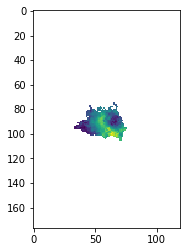

In [13]:
np.size(plotfield)
plt.imshow(plotfield)
plt.show()

#### add geographic information with Basemap

/home/admin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


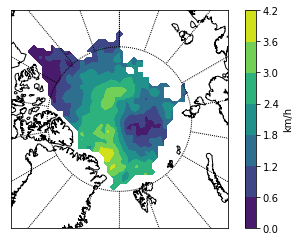

In [14]:
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l')
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
im=m.contourf(lon_map,lat_map,plotfield)

cbar=plt.colorbar()
cbar.set_label('km/h')

plt.show()

### load an example concentration file

In [16]:
# load an example file
AMSR2file = 'seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201907111200.nc'
fl = Dataset(OSISAFfile)
#xc=fl.variables['xc']
#yc=fl.variables['yc']
#XC,YC=np.meshgrid(xc,yc)
fl.close()

### Compute forward trajectories; class Buoys

In [75]:
class Buoys:
    
    global rad, r_earth
    rad=np.pi/180.0 # radiant <-> degree
    r_earth=6.3675*10**6 # radius of Earth in [m]
    
    def __init__(self, lon_start, lat_start, earliest_date_of_buoy, start_advect_date):
        self.oldlon = lon_start*rad
        self.oldlat = lat_start*rad
        self.lon = lon_start*rad
        self.lat = lat_start*rad
        self.initlon = lon_start*rad
        self.initlat = lat_start*rad
        self.old_u = np.zeros(lon_start.shape)
        self.old_v = np.zeros(lon_start.shape)
        self.date = datetime.strptime(earliest_date_of_buoy, "%Y-%m-%d %H:%M:%S")
        self.startdates = start_advect_date
        #self.delta_x = np.zeros(lon_start.shape)
        #self.delta_y = np.zeros(lon_start.shape)
        #self.u_ice = np.zeros(lon_start.shape)
        #self.v_ice = np.zeros(lon_start.shape)
        
    def getdate(self):
        return self.date.strftime("%Y-%m-%d %H:%M:%S")
        
    def trajectory(self, new_u,new_v, delta_t):
        print("Update buoy positions. Integrate for " + str(delta_t/3600.) + " hours.")
        
        #save old position in case the drifter leaves the domain
        self.oldlon = self.lon # radiant
        self.oldlat = self.lat # radiant
        
        #displacement vectors
        deltax1 = self.old_u * delta_t
        deltay1 = self.old_v * delta_t
        deltax2 = new_u * delta_t
        deltay2 = new_v * delta_t
        
        #Heun method (2nd order)
        self.lon = self.lon + (0.5*(deltax1 + deltax2) / (r_earth*np.cos(self.lat.values)) )
        self.lat = self.lat + (0.5*(deltay1 + deltay2) /  r_earth )
        
        # keep degree in range 0..360 and -90..90
        lon_deg=self.lon/rad % 360
        lat_deg=np.clip(self.lat/rad, -90., 90.)
        self.lon = lon_deg*rad
        self.lat = lat_deg*rad
        
        #update velocity here (old value was needed for heun method)
        self.old_u=new_u
        self.old_v=new_v
        
        # set positions to NaN before the buoy is supposed to move
        idx=getindices_beforestart(self.getdate(), self.startdates)
        lon_deg[idx] = np.nan
        lat_deg[idx] = np.nan
        self.lon[idx] = self.initlon[idx]
        self.lat[idx] = self.initlat[idx]
        self.old_u[idx]=0.
        self.old_v[idx]=0.
        
        # update time stamp
        self.date = self.date + timedelta(seconds=delta_t)

        return lon_deg, lat_deg


In [76]:
def getindices_beforestart(currentdate, startdates):
        
    indices=np.zeros(np.shape(start_dates),dtype='bool')
    for i,val in enumerate(startdates):
        # don't advect yet
        if currentdate < startdates[i]:
            indices[i]=True
            
    return indices

In [77]:
def loaddate_ofOSISAF(datestring, hemisphere='nh'):
    
    # convert datestring to datetime object
    thedate = datetime.strptime(datestring, "%Y-%m-%d %H:%M:%S")
    
    # let's construct the file name, 
    # e.g. drift-velocities/archive/ice/drift_lr/merged/2019/09/
    # ice_drift_nh_polstere-625_multi-oi_201909011200-201909031200.nc
    pathtofile="drift-velocities/archive/ice/drift_lr/merged/"
    # middle part
    middlefilename="ice_drift_"+hemisphere+"_polstere-625_multi-oi_"
    # e.g. 201907291200-201907311200 (48hr span)
    enddate=thedate + timedelta(days=2)
    # YYYY/MM/ (from end date)
    YYYYMM=enddate.strftime("%Y")+"/"+enddate.strftime("%m")+"/"
    endfilename= thedate.strftime("%Y%m%d%H%M") + "-" + enddate.strftime("%Y%m%d%H%M") + '.nc'
    
    # the OSISAF file to be loaded
    filename=pathtofile + YYYYMM + middlefilename + endfilename
    print("loading "+filename+ " ...") # Python3 needs brackets here
    
    # load the file
    fl = Dataset(filename)
    #xc=fl.variables['xc']
    #yc=fl.variables['yc']
    #XC,YC=np.meshgrid(xc,yc)
    
    # lon lat on grid
    lon_start=np.copy(fl.variables['lon'])
    lat_start=np.copy(fl.variables['lat'])

    # lon lat at the end of the displacement
    lon_end=np.squeeze(fl.variables['lon1'][0,:,:])
    lat_end=np.squeeze(fl.variables['lat1'][0,:,:])
    
    # close the file
    fl.close()
    
    # compute Ufield from end points and start points (48hour change)
    deltalon=lon_end-lon_start
    deltalon[deltalon>100.]=deltalon[deltalon>100.]-360.   # jump at -180..180
    deltalon[deltalon<-100.]=deltalon[deltalon<-100.]+360. # jump at -180..180
    Ufield=deltalon/48. *length_of_latitude_circle(lat=lat_start[:,:])/360. / 3.6 # km/h -> m/s
    
    # compute Vfield as well
    Vfield=(lat_end-lat_start)/48. *length_of_latitude_circle(lat=0.)/360. / 3.6 #km/h -> m/s
    
    return Ufield, Vfield

In [78]:
# test
datestring='2019-09-01 12:00:00'
Ufield, Vfield = loaddate_ofOSISAF(datestring, hemisphere='nh')

loading drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909011200-201909031200.nc ...


In [79]:
def find_UV_atbuoy_pos(lon_start,lat_start, Ufield,Vfield, objects):
    
    # (lon,lat) tuples of the underlying grid
    A=np.array([lon_start[:,:].flatten(), lat_start[:,:].flatten()]).T # -180..180 assumed in OSISAF
    # change to -180..180 as assumed in OSISAF data; in the trajectory code its 0..360
    lon_adjust=objects.lon/rad
    lon_adjust[lon_adjust>180.]=lon_adjust[lon_adjust>180.]-360.
    # zip buoy (lon & lat) arrays to (lon,lat) tuples
    tuples = np.column_stack((lon_adjust,objects.lat/rad)) 
    # fast KDTree nearest neighbor method
    idx=spatial.KDTree(A).query(tuples)[1]
    
    return Ufield[idx], Vfield[idx]

In [80]:
def find_idx_atbuoy_pos(lon_start,lat_start, poslon, poslat):
    
    # (lon,lat) tuples of the underlying grid
    A=np.array([lon_start[:,:].flatten(), lat_start[:,:].flatten()]).T # -180..180 assumed in OSISAF
    # change to -180..180 as assumed in OSISAF data; poslon is 0..360
    lon_adjust=poslon
    lon_adjust[lon_adjust>180.]=lon_adjust[lon_adjust>180.]-360.
    # zip buoy (lon & lat) arrays to (lon,lat) tuples
    tuples = np.column_stack((lon_adjust,poslat)) 
    
    # fast KDTree nearest neighbor method
    return spatial.KDTree(A).query(tuples)[1]

### Generate DataFrame of buoy positions and dates

In [81]:
# pick some locations here
poslon=np.array([160.,157.,163.,160.,157.,163.,82.,88.,80.])
poslat=np.array([84.,84.,85.,83.,83.,83.,84.,87.,88.])
# find the closest point on OSISAF grid
idx=find_idx_atbuoy_pos(lon_start,lat_start, poslon, poslat)

# starting points (black)
test_startlo=lon_start[:,:].flatten()[idx]
test_startla=lat_start[:,:].flatten()[idx]

# end points (yellow)
test_endlo=lon_end[:,:].flatten()[idx]
test_endla=lat_end[:,:].flatten()[idx]

/home/admin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


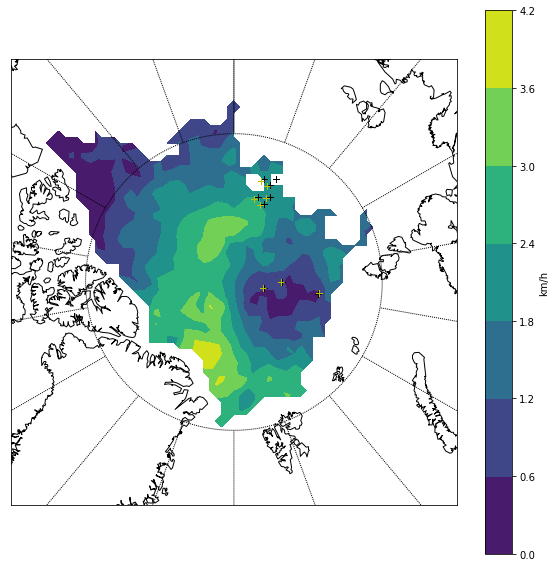

In [82]:
# plot start and end points

fig=plt.figure(figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l')
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
im=m.contourf(lon_map,lat_map,plotfield)

for i,val in enumerate(test_startlo):
    lon_map,lat_map=m(test_startlo,test_startla)
    m.plot(lon_map,lat_map,'k+')
    
    lon_map,lat_map=m(test_endlo,test_endla)
    m.plot(lon_map,lat_map,'y+')

cbar=plt.colorbar()
cbar.set_label('km/h')

plt.show()

#### do the actual computation

In [83]:
# updated once per hour, every day, 24/7
!wget https://swift.dkrz.de/v1/dkrz_0262ea1f00e34439850f3f1d71817205/SIDFEx_index/SIDFEx_targettable.txt

--2019-09-11 23:42:19--  https://swift.dkrz.de/v1/dkrz_0262ea1f00e34439850f3f1d71817205/SIDFEx_index/SIDFEx_targettable.txt
Resolving swift.dkrz.de (swift.dkrz.de)... 2001:638:70e:324::4a, 2001:638:70e:324::4b, 2001:638:70e:324::49, ...
Connecting to swift.dkrz.de (swift.dkrz.de)|2001:638:70e:324::4a|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3891 (3.8K) [text/plain]
Saving to: ‘SIDFEx_targettable.txt.3’

SIDFEx_targettable. 100%[===================>]   3.80K  --.-KB/s    in 0s      

2019-09-11 23:42:19 (71.5 MB/s) - ‘SIDFEx_targettable.txt.3’ saved [3891/3891]



In [84]:
# skip header (20 rows), read first two columns separately as strings
fname='SIDFEx_targettable.txt'
#0:TargetID 
#1:Current_Target 
targets_ID=np.loadtxt(fname, skiprows=20, usecols=(0,1), dtype='str') #'string'
#2:Latest_Position_Year 0
#3:Latest_Position_DayOfYear 1
#4:Latest_Position_Lat 2
#5:Latest_Position_Lon 3
#6:Total_First_Year 4
#7:Total_First_DayOfYear 5
#8:SIDFEx_First_Year 6
#9:SIDFEx_First_DayOfYear 7
#10:SIDFEx_Last_Year 8
#11:SIDFEx_Last_DayOfYear 9
#12:Total_Last_Year 10
#13:Total_Last_DayOfYear 11
targets=np.loadtxt(fname, skiprows=20, usecols=(2,3,4,5,6,7,8,9,10,11,12,13))

In [85]:
# BuoyID              Year     Hour   Min     DOY     POS_DOY      Lat           Lon          BP         Ts       Ta

poslat=np.array([72.54045, 73.74480, 73.70138, 75.74371, 69.05740, 80.20440, 79.24860, 84.16620, \
                 74.54620, 72.39185, 71.83907, 84.18900, 80.93260, 86.33100, 81.43820, 84.12240, \
                 89.97849, 78.63360, 82.55300, 83.78700, 83.43040, 85., 84., 84., 86., 86.])
poslon=np.array([162.44145, 171.71580, -148.48599, -151.74365, -168.96540, -165.20620, -165.38980, \
                -129.51140, 167.05740, -149.58145, -144.31197, -166.08760, -162.75800, -157.63920, \
                -137.96280, -99.60780, -86.82324, -169.91300, 122.54200, 124.48000, 153.44240, \
                130., 120., 140., 120., 140.])
poslon[poslon<0]=poslon[poslon<0]+360.

#0  127317              2017     00     00     1.000     1.000     72.54045     162.44145     959.80     -2.23     -0.75
#1  300234060436000     2017     00     00     1.000     1.000     73.74480     171.71580     1011.20     -15.80
#2  300234063991680     2017     00     00     1.000     1.000     73.70138     -148.48599     1016.00     -6.59
#3  139939              2017     00     00     1.000     1.000     75.74371     -151.74365     1015.30     -4.41     -29.27
#4  300234063803010     2017     00     00     169.00 169.0000     69.05740     -168.96540     1011.40     6.27
#5  300234060834110     2017     02     00     1.083     1.083     80.20440     -165.20620     1019.50     -15.60
#6  300234060434550     2017     00     00     1.000     1.000     79.24860     -165.38980     1017.60     -19.00
#7  300234062738010     2017     00     00     1.000     1.000     84.16620     -129.51140     1025.50     -33.70
#8  300234060430010     2017     21     00     1.875     1.875     74.54620     167.05740     968.20     -5.80
#9  300234066711310     2018     20     30     88.854   88.854     72.39185     -149.58145     -4.10
#10 300234066713470     2018     19     02     89.793   89.793     71.83907     -144.31197     -0.01
#11 300234065495020     2018     23     00     153.958 153.958     84.18900     -166.08760     1018.30     1.80
#12 300234066036110     2018     03     00     167.125 167.125     80.93260     -162.75800     1018.60     1.70     3.10
#13 300234066030330     2018     17     00     166.708 166.625     86.33100     -157.63920     1019.90     0.60     7.60
#14 300234066030190     2018     17     00     166.708 166.625     81.43820     -137.96280     1021.50     0.50     4.80
#15 300234066031190     2018     17     00     166.708 166.625     84.12240     -99.60780     1017.00     0.70     4.90
#16 300234066830700     2018     04     00     112.167 112.167     89.97849     -86.82324
#17 300234062880820     2018     21     00     317.875 317.875     78.63360     -169.91300     1000.60     -2.00
#18 300234065801030     2018     00     00     290.000 290.000     82.55300     122.54200     995.50     -2.41
#19 300234065802030     2018     00     00     290.000 290.000     83.78700     124.48000     999.90     -4.83
#20 300234061872720     2018     00     00     290.000 290.000     83.43040     153.44240     1000.00     -6.04
#21 FIXED85N130E
#22 FIXED84N120E
#23 FIXED84N140E
#24 FIXED86N120E
#25 FIXED86N140E
buoynum=25
targets_ID[buoynum], start_dates[buoynum], targets[buoynum,7]

(array(['FIXED86N140E', 'TRUE'], dtype='<U15'), '2019-07-29 00:00:00', 210.0)

In [86]:
poslon.shape, poslat.shape

((26,), (26,))

In [87]:
# targets that are not active anymore:
targets_ID[targets_ID[:,1]=='FALSE']
# still alive
targets_ID[targets_ID[:,1]=='TRUE']

array([['300234063991680', 'TRUE'],
       ['300234065495020', 'TRUE'],
       ['300234066036110', 'TRUE'],
       ['300234066030330', 'TRUE'],
       ['300234066030190', 'TRUE'],
       ['300234066031190', 'TRUE'],
       ['300234062880820', 'TRUE'],
       ['300234065801030', 'TRUE'],
       ['300234065802030', 'TRUE'],
       ['300234061872720', 'TRUE'],
       ['FIXED85N130E', 'TRUE'],
       ['FIXED84N120E', 'TRUE'],
       ['FIXED84N140E', 'TRUE'],
       ['FIXED86N120E', 'TRUE'],
       ['FIXED86N140E', 'TRUE']], dtype='<U15')

In [88]:
SIDFEx_First_Year=np.array(targets[:,6],dtype='int')
SIDFEx_First_DayOfYear=targets[:,7]
start_dates=list()

In [89]:
for i,val in enumerate(SIDFEx_First_DayOfYear):
    dates=datetime.strptime(str(SIDFEx_First_Year[i])+"-01-01 00:00:00", "%Y-%m-%d %H:%M:%S") + timedelta(days=SIDFEx_First_DayOfYear[i]-1.)
    start_dates.append(dates.strftime("%Y-%m-%d %H:%M:%S"))

In [90]:
# how many days until the forcing runs out?

# convert datestring to datetime object
initialdate='2017-01-01 00:00:00'
#initialdate='2013-10-01 12:00:00'
thedate = datetime.strptime(initialdate, "%Y-%m-%d %H:%M:%S")

endofforcing='2019-09-04 12:00:00'
endoftime = datetime.strptime(endofforcing, "%Y-%m-%d %H:%M:%S")

delta=endoftime - thedate
delta.days

976

In [91]:
# config
initialdate='2017-01-01 12:00:00'
num_times=delta.days+1   # integrate for x ...
delta_t=86400 # ... days [seconds]
num_buoys=poslon.shape[0]
#start_dates=['2018-10-02 12:00:00','2018-10-03 12:00:00','2018-10-04 12:00:00','2018-10-05 12:00:00','2018-10-01 12:00:00','2018-10-01 12:00:00','2018-10-01 12:00:00','2018-10-01 12:00:00','2018-10-01 12:00:00']


                

# generate DataFrame that will be filled with positions
dates = [initialdate]
lons = np.zeros((1, num_buoys))*np.nan
lats = np.zeros((1, num_buoys))*np.nan
lons_df = pd.DataFrame(data=lons, index=dates)
lats_df = pd.DataFrame(data=lats, index=dates)

# set initial positions at initial date, 0..360, 0..90
lons_df.loc[initialdate] = poslon # np.arange(90.,110.,1.)
lats_df.loc[initialdate] = poslat # 86.*np.ones_like(np.arange(100.,120.,1.))
lons_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
2017-01-01 12:00:00,162.44145,171.7158,211.51401,208.25635,191.0346,194.7938,194.6102,230.4886,167.0574,210.41855,...,273.17676,190.087,122.542,124.48,153.4424,130.0,120.0,140.0,120.0,140.0


In [92]:
# initialize the objects
objects = Buoys(lons_df.loc[initialdate],lats_df.loc[initialdate],initialdate, start_dates)

In [93]:
# integrate objects forward in time
for i in np.arange(0,num_times):
    print('This is loop #'+str(i))
    
    # test with constant U,V
    #LON,LAT=objects.trajectory(-1./3.6,0.0,delta_t=86400) # U,V in m/s; 1000/3600 is 1km/h
    
    # get sea ice velocity fields from data
    Ufield, Vfield = loaddate_ofOSISAF(objects.getdate(), hemisphere='nh')

    # evaluate velocity fields at buoy position (NN, could be interpolated as well)
    U,V=find_UV_atbuoy_pos(lon_start,lat_start, Ufield.flatten(),Vfield.flatten(), objects)
    
    # don't advect buoys when there is no ice
    fixed=np.logical_or(U.mask, V.mask)
    U[fixed]=0.
    V[fixed]=0.
    
    # advect buoys
    LON,LAT=objects.trajectory(U,V,delta_t=delta_t) # U,V in m/s, delta_t in seconds
    
    # append the date and the positions to data frame
    lons_df=lons_df.append(LON.rename(objects.getdate())) # ADD CURRENT TIME HERE
    lats_df=lats_df.append(LAT.rename(objects.getdate()))
    #lons_df=lons_df.append(pd.DataFrame(data=LON, index=[objects.getdate()])) # ADD CURRENT TIME HERE
    #lats_df=lats_df.append(pd.DataFrame(data=LAT, index=[objects.getdate()]))

This is loop #0
loading drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701011200-201701031200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #1
loading drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701021200-201701041200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #2
loading drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701031200-201701051200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #3
loading drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701041200-201701061200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #4
loading drift-velocities/archive/ice/drift_lr/merged/2017/01/ice_drift_nh_polstere-625_multi-oi_201701051200-201701071200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #5
loading drift-

Update buoy positions. Integrate for 24.0 hours.
This is loop #44
loading drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702141200-201702161200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #45
loading drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702151200-201702171200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #46
loading drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702161200-201702181200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #47
loading drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702171200-201702191200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #48
loading drift-velocities/archive/ice/drift_lr/merged/2017/02/ice_drift_nh_polstere-625_multi-oi_201702181200-201702201200.nc ...
Update buoy positions. In

Update buoy positions. Integrate for 24.0 hours.
This is loop #88
loading drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201703301200-201704011200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #89
loading drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201703311200-201704021200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #90
loading drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201704011200-201704031200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #91
loading drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201704021200-201704041200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #92
loading drift-velocities/archive/ice/drift_lr/merged/2017/04/ice_drift_nh_polstere-625_multi-oi_201704031200-201704051200.nc ...
Update buoy positions. In

Update buoy positions. Integrate for 24.0 hours.
This is loop #130
loading drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705111200-201705131200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #131
loading drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705121200-201705141200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #132
loading drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705131200-201705151200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #133
loading drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705141200-201705161200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #134
loading drift-velocities/archive/ice/drift_lr/merged/2017/05/ice_drift_nh_polstere-625_multi-oi_201705151200-201705171200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #172
loading drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201706221200-201706241200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #173
loading drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201706231200-201706251200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #174
loading drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201706241200-201706261200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #175
loading drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201706251200-201706271200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #176
loading drift-velocities/archive/ice/drift_lr/merged/2017/06/ice_drift_nh_polstere-625_multi-oi_201706261200-201706281200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #215
loading drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708041200-201708061200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #216
loading drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708051200-201708071200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #217
loading drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708061200-201708081200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #218
loading drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708071200-201708091200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #219
loading drift-velocities/archive/ice/drift_lr/merged/2017/08/ice_drift_nh_polstere-625_multi-oi_201708081200-201708101200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #257
loading drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709151200-201709171200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #258
loading drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709161200-201709181200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #259
loading drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709171200-201709191200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #260
loading drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709181200-201709201200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #261
loading drift-velocities/archive/ice/drift_lr/merged/2017/09/ice_drift_nh_polstere-625_multi-oi_201709191200-201709211200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #299
loading drift-velocities/archive/ice/drift_lr/merged/2017/10/ice_drift_nh_polstere-625_multi-oi_201710271200-201710291200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #300
loading drift-velocities/archive/ice/drift_lr/merged/2017/10/ice_drift_nh_polstere-625_multi-oi_201710281200-201710301200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #301
loading drift-velocities/archive/ice/drift_lr/merged/2017/10/ice_drift_nh_polstere-625_multi-oi_201710291200-201710311200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #302
loading drift-velocities/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201710301200-201711011200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #303
loading drift-velocities/archive/ice/drift_lr/merged/2017/11/ice_drift_nh_polstere-625_multi-oi_201710311200-201711021200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #341
loading drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712081200-201712101200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #342
loading drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712091200-201712111200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #343
loading drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712101200-201712121200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #344
loading drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712111200-201712131200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #345
loading drift-velocities/archive/ice/drift_lr/merged/2017/12/ice_drift_nh_polstere-625_multi-oi_201712121200-201712141200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #383
loading drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801191200-201801211200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #384
loading drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801201200-201801221200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #385
loading drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801211200-201801231200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #386
loading drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801221200-201801241200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #387
loading drift-velocities/archive/ice/drift_lr/merged/2018/01/ice_drift_nh_polstere-625_multi-oi_201801231200-201801251200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #425
loading drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803021200-201803041200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #426
loading drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803031200-201803051200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #427
loading drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803041200-201803061200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #428
loading drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803051200-201803071200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #429
loading drift-velocities/archive/ice/drift_lr/merged/2018/03/ice_drift_nh_polstere-625_multi-oi_201803061200-201803081200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #467
loading drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804131200-201804151200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #468
loading drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804141200-201804161200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #469
loading drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804151200-201804171200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #470
loading drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804161200-201804181200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #471
loading drift-velocities/archive/ice/drift_lr/merged/2018/04/ice_drift_nh_polstere-625_multi-oi_201804171200-201804191200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #510
loading drift-velocities/archive/ice/drift_lr/merged/2018/05/ice_drift_nh_polstere-625_multi-oi_201805261200-201805281200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #511
loading drift-velocities/archive/ice/drift_lr/merged/2018/05/ice_drift_nh_polstere-625_multi-oi_201805271200-201805291200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #512
loading drift-velocities/archive/ice/drift_lr/merged/2018/05/ice_drift_nh_polstere-625_multi-oi_201805281200-201805301200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #513
loading drift-velocities/archive/ice/drift_lr/merged/2018/05/ice_drift_nh_polstere-625_multi-oi_201805291200-201805311200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #514
loading drift-velocities/archive/ice/drift_lr/merged/2018/06/ice_drift_nh_polstere-625_multi-oi_201805301200-201806011200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #552
loading drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807071200-201807091200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #553
loading drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807081200-201807101200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #554
loading drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807091200-201807111200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #555
loading drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807101200-201807121200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #556
loading drift-velocities/archive/ice/drift_lr/merged/2018/07/ice_drift_nh_polstere-625_multi-oi_201807111200-201807131200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #594
loading drift-velocities/archive/ice/drift_lr/merged/2018/08/ice_drift_nh_polstere-625_multi-oi_201808181200-201808201200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #595
loading drift-velocities/archive/ice/drift_lr/merged/2018/08/ice_drift_nh_polstere-625_multi-oi_201808191200-201808211200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #596
loading drift-velocities/archive/ice/drift_lr/merged/2018/08/ice_drift_nh_polstere-625_multi-oi_201808201200-201808221200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #597
loading drift-velocities/archive/ice/drift_lr/merged/2018/08/ice_drift_nh_polstere-625_multi-oi_201808211200-201808231200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #598
loading drift-velocities/archive/ice/drift_lr/merged/2018/08/ice_drift_nh_polstere-625_multi-oi_201808221200-201808241200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #636
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201809291200-201810011200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #637
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201809301200-201810021200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #638
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810011200-201810031200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #639
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810021200-201810041200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #640
loading drift-velocities/archive/ice/drift_lr/merged/2018/10/ice_drift_nh_polstere-625_multi-oi_201810031200-201810051200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #678
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811101200-201811121200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #679
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811111200-201811131200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #680
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811121200-201811141200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #681
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811131200-201811151200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #682
loading drift-velocities/archive/ice/drift_lr/merged/2018/11/ice_drift_nh_polstere-625_multi-oi_201811141200-201811161200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #720
loading drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812221200-201812241200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #721
loading drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812231200-201812251200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #722
loading drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812241200-201812261200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #723
loading drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812251200-201812271200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #724
loading drift-velocities/archive/ice/drift_lr/merged/2018/12/ice_drift_nh_polstere-625_multi-oi_201812261200-201812281200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #763
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902031200-201902051200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #764
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902041200-201902061200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #765
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902051200-201902071200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #766
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902061200-201902081200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #767
loading drift-velocities/archive/ice/drift_lr/merged/2019/02/ice_drift_nh_polstere-625_multi-oi_201902071200-201902091200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #805
loading drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903171200-201903191200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #806
loading drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903181200-201903201200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #807
loading drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903191200-201903211200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #808
loading drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903201200-201903221200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #809
loading drift-velocities/archive/ice/drift_lr/merged/2019/03/ice_drift_nh_polstere-625_multi-oi_201903211200-201903231200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #847
loading drift-velocities/archive/ice/drift_lr/merged/2019/04/ice_drift_nh_polstere-625_multi-oi_201904281200-201904301200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #848
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201904291200-201905011200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #849
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201904301200-201905021200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #850
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905011200-201905031200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #851
loading drift-velocities/archive/ice/drift_lr/merged/2019/05/ice_drift_nh_polstere-625_multi-oi_201905021200-201905041200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #889
loading drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906091200-201906111200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #890
loading drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906101200-201906121200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #891
loading drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906111200-201906131200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #892
loading drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906121200-201906141200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #893
loading drift-velocities/archive/ice/drift_lr/merged/2019/06/ice_drift_nh_polstere-625_multi-oi_201906131200-201906151200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #931
loading drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907211200-201907231200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #932
loading drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907221200-201907241200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #933
loading drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907231200-201907251200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #934
loading drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907241200-201907261200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #935
loading drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907251200-201907271200.nc ...
Update buoy position

Update buoy positions. Integrate for 24.0 hours.
This is loop #973
loading drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909011200-201909031200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #974
loading drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909021200-201909041200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #975
loading drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909031200-201909051200.nc ...
Update buoy positions. Integrate for 24.0 hours.
This is loop #976
loading drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201909041200-201909061200.nc ...
Update buoy positions. Integrate for 24.0 hours.


In [94]:
idx=getindices_beforestart(initialdate, start_dates)
lons_df.loc[initialdate][idx] = np.nan # np.arange(90.,110.,1.)
lats_df.loc[initialdate][idx] = np.nan # 86.*np.ones_like(np.arange(100.,120.,1.))
lons_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
2017-01-01 12:00:00,162.441450,171.715800,211.514010,208.256350,NaN,194.793800,194.610200,230.488600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02 12:00:00,162.532730,171.876540,211.605699,208.374979,NaN,194.614352,194.655134,230.408407,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 12:00:00,162.776741,172.304583,211.983606,208.854723,NaN,194.685919,195.107421,230.165803,167.183809,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 12:00:00,163.062388,172.801941,212.522046,209.595360,NaN,195.268599,195.885608,229.755293,167.498505,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05 12:00:00,163.122109,173.121583,212.853826,210.142719,NaN,196.004048,196.627200,229.461740,167.764847,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-01 12:00:00,158.450748,153.674241,279.532767,206.505481,183.057048,234.778284,220.546389,326.165919,154.066661,205.386665,...,357.840858,199.179146,36.745974,27.644037,2.734743,131.346412,124.053115,143.773509,115.601908,138.572586
2019-09-02 12:00:00,158.450748,153.674241,283.908941,207.745759,183.057048,234.778284,220.546389,326.165919,154.066661,205.386665,...,357.840858,199.801040,36.238398,27.644037,2.184316,131.152477,123.894165,143.949583,114.009143,138.358118
2019-09-03 12:00:00,158.450748,153.674241,287.821330,209.547238,183.057048,234.778284,220.546389,326.165919,154.066661,205.386665,...,357.840858,200.595713,35.990873,27.644037,1.895612,131.144725,123.695929,144.389126,112.992432,138.450105
2019-09-04 12:00:00,158.450748,153.674241,291.830287,212.112703,183.057048,234.778284,220.546389,326.165919,154.066661,205.386665,...,357.840858,201.859315,35.543562,27.644037,1.887386,131.497902,124.121197,144.692728,112.848471,139.431526


#### plot the trajectories 

/home/admin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


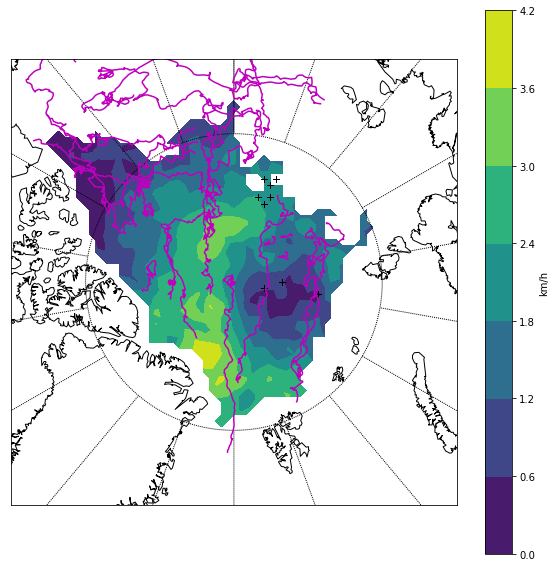

In [95]:
fig=plt.figure(figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l') # -180..180
#m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l') # -180..180
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')

m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')

# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
m.contourf(lon_map,lat_map,plotfield)

# STARTING TEST POINTS
for i,val in enumerate(test_startlo):
    lon_map,lat_map=m(test_startlo,test_startla)
    m.plot(lon_map,lat_map,'k+')
    
    # END TEST POINTS (as given in OSISAF data)
    #lon_map,lat_map=m(test_endlo,test_endla)
    #m.plot(lon_map,lat_map,'y+')
    
# COMPUTED TRAJECTORY FROM Uice Vice
for buoynum in np.arange(0,num_buoys):
    a = np.ma.array(lons_df[buoynum][:].values, mask=np.isnan(lons_df[buoynum][:].values))
    b = np.ma.array(lats_df[buoynum][:].values, mask=np.isnan(lats_df[buoynum][:].values))
    lon_traj,lat_traj=m(a,b)
    m.plot(lon_traj, lat_traj,'m')
    

cbar=plt.colorbar()
cbar.set_label('km/h')
plt.show()

### export to SIDFEx format 

##### example header:

In [ ]:
SubmitYear: 2019
SubmitDayOfYear: 136.362
ProcessedYear: 2019
ProcessedDayOfYear: 136.375
### end of auto header
GroupID: awi001
MethodID: ClimRunVers2019May
TargetID: 300234066830700
InitYear: 2019
InitDayOfYear: 90
InitLat: 73.63310
InitLon: -8.17290
EnsMemNum: 010
### end of header
Year DayOfYear Lat Lon
2019  90  73.63310  -8.17290

##### fake a header for our trajectories

In [100]:
lons_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
2017-01-01 12:00:00,162.441450,171.715800,211.514010,208.256350,NaN,194.793800,194.610200,230.488600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02 12:00:00,162.532730,171.876540,211.605699,208.374979,NaN,194.614352,194.655134,230.408407,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 12:00:00,162.776741,172.304583,211.983606,208.854723,NaN,194.685919,195.107421,230.165803,167.183809,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 12:00:00,163.062388,172.801941,212.522046,209.595360,NaN,195.268599,195.885608,229.755293,167.498505,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05 12:00:00,163.122109,173.121583,212.853826,210.142719,NaN,196.004048,196.627200,229.461740,167.764847,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-01 12:00:00,158.450748,153.674241,279.532767,206.505481,183.057048,234.778284,220.546389,326.165919,154.066661,205.386665,...,357.840858,199.179146,36.745974,27.644037,2.734743,131.346412,124.053115,143.773509,115.601908,138.572586
2019-09-02 12:00:00,158.450748,153.674241,283.908941,207.745759,183.057048,234.778284,220.546389,326.165919,154.066661,205.386665,...,357.840858,199.801040,36.238398,27.644037,2.184316,131.152477,123.894165,143.949583,114.009143,138.358118
2019-09-03 12:00:00,158.450748,153.674241,287.821330,209.547238,183.057048,234.778284,220.546389,326.165919,154.066661,205.386665,...,357.840858,200.595713,35.990873,27.644037,1.895612,131.144725,123.695929,144.389126,112.992432,138.450105
2019-09-04 12:00:00,158.450748,153.674241,291.830287,212.112703,183.057048,234.778284,220.546389,326.165919,154.066661,205.386665,...,357.840858,201.859315,35.543562,27.644037,1.887386,131.497902,124.121197,144.692728,112.848471,139.431526


In [102]:
# CONTRIBUTION DETAILS
GroupID='mss001' # MOSAiC Summer School
MethodID='ClimRunOSISAF'

# SAVE FILES WITH TARGET ID, LOOP OVER TARGETS

TargetID=0 # will use this as column index in lons_df so far
EnsMemNum=1

# initial time of the trajectory; ignore initial NaNs
initialtime_traj=datetime.strptime(lons_df[0].index[np.isfinite(lons_df[0].values)][0], "%Y-%m-%d %H:%M:%S")
InitYear=initialtime_traj.year

# initial day of the trajectory (counted from beginning of the year)
begin_initializedyear=str(InitYear)+'-01-01 00:00:00'
# difference in fractional days
delta=initialtime_traj - datetime.strptime(begin_initializedyear, "%Y-%m-%d %H:%M:%S")
#fracdays=delta.total_seconds() / timedelta(days=1).total_seconds()
InitDayOfYear=delta.days + 1 # IABP convention

# intial position
InitLat=np.round(lats_df[TargetID][np.isfinite(lats_df[0].values)][0],5)
InitLon=np.round(lons_df[TargetID][np.isfinite(lons_df[0].values)][0],5)

# SUBMISSION DETAILS
# beginning of this year
initialdate='2019-01-01 00:00:00'
yearbegin = datetime.strptime(initialdate, "%Y-%m-%d %H:%M:%S")
# current time
now=datetime.now()
# difference in fractional days
delta=now - yearbegin
fracdays=delta.total_seconds() / timedelta(days=1).total_seconds() + 1 # IABP convention

# create the header of SIDFEx format
SubmitYear=now.year
SubmitDayOfYear=np.round(fracdays,3) #np.round(delta.days,3)
ProcessedYear=now.year
ProcessedDayOfYear=np.round(fracdays,3) #np.round(delta.days,3)

# fake auto header (usually done on DKRZ cloud)
autoheader= "SubmitYear: "+str(SubmitYear)+ \
        "\nSubmitDayOfYear: "+str(SubmitDayOfYear)+ \
        "\nProcessedYear: "+str(ProcessedYear)+ \
        "\nProcessedDayOfYear: "+str(ProcessedDayOfYear)+ \
        "\n### end of auto header"

#print autoheader

# main header
mainheader= "\nGroupID: "+GroupID+ \
        "\nMethodID: "+MethodID+ \
        "\nTargetID: "+str(TargetID)+ \
        "\nInitYear: "+str(InitYear)+ \
        "\nInitDayOfYear: "+str(InitDayOfYear)+ \
        "\nInitLat: "+str(InitLat)+ \
        "\nInitLon: "+str(InitLon)+ \
        "\nEnsMemNum: "+str(EnsMemNum).zfill(3)+ \
        "\n### end of header"
        

# Year DayOfYear Lat Lon
# 2019  90  73.63310  -8.17290
header=autoheader+mainheader+"\nYear DayOfYear Lat Lon"

print(header)

# main data here

# initialize X
length=lons_df[TargetID][np.isfinite(lons_df[TargetID].values)].shape[0]
X=np.zeros((length,4))

# fill with positions
X[:,2]=np.round(lats_df[TargetID][np.isfinite(lats_df[TargetID].values)],5)
X[:,3]=np.round(lons_df[TargetID][np.isfinite(lons_df[TargetID].values)],5)

# fill X with date information
for i,val in enumerate(lons_df[TargetID][np.isfinite(lons_df[TargetID].values)].index.tolist()):
    
    # fill X with year information
    date=datetime.strptime(val, "%Y-%m-%d %H:%M:%S")
    X[i,0]=date.year
    
    # fill X with day of year information
    begin_ofyear=str(date.year)+'-01-01 00:00:00'
    delta=date - datetime.strptime(begin_ofyear, "%Y-%m-%d %H:%M:%S")
    #fracdays=delta.total_seconds() / timedelta(days=1).total_seconds()
    X[i,1]=delta.days+1 # IABP convention
    
print(X[0,:])

# save the file
np.savetxt(GroupID+'_'+MethodID+'_'+str(TargetID)+'_'+str(InitYear)+'-'+str(InitDayOfYear)+'_'+str(EnsMemNum).zfill(3)+'.txt',X, header=header, fmt='%i  %i  %f  %f', comments='')

SubmitYear: 2019
SubmitDayOfYear: 254.996
ProcessedYear: 2019
ProcessedDayOfYear: 254.996
### end of auto header
GroupID: mss001
MethodID: ClimRunOSISAF
TargetID: 0
InitYear: 2017
InitDayOfYear: 1
InitLat: 72.54045
InitLon: 162.44145
EnsMemNum: 001
### end of header
Year DayOfYear Lat Lon
[2.0170000e+03 1.0000000e+00 7.2540450e+01 1.6244145e+02]


In [103]:
pwd

'/home/admin/MOSAiC-School-ensemble'

In [104]:
GroupID+'_'+MethodID+'_'+str(TargetID)+'_'+str(InitYear)+'-'+str(InitDayOfYear)+'_'+str(EnsMemNum).zfill(3)+'.txt'

'mss001_ClimRunOSISAF_0_2017-1_001.txt'

In [105]:
less mss001_ClimRunOSISAF_0_2017-1_001.txt

- Parallel computing, sea ice age maps, Durchmischung, leads, Alleinstellungsmerkmal
- MOSAIC school ensemble machen fuer SiDFex?
- DWD forecast available, at ship position, get a file